In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/Supp_Table_6_filtered_lfq_discovery.csv', sep=';', header=0)
df = df.drop(columns=['Razor + unique peptides', 'Unique peptides','Q-value', 
                      'Score', 'Intensity', 'MS/MS count', 'Protein IDs',
       'Majority protein IDs', 'Protein names', 'Column1', 'Column2',
       'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8',
       'Column9', 'Column10', 'Column11', 'Column12'])

labels = df.iloc[-1]
df_labels = labels.to_frame()
df_labels = df_labels.tail(df_labels.shape[0] -1)
df_labels = df_labels.rename(columns={1658: "labels"})

df_genes = df.iloc[:-1 , :]

,Mean,Std_Dev,Variance,labels,index_col
LFQ intensity BUL_103,23.294656,2.237722,5.007398,Healthy,1
LFQ intensity BUL_30,21.913219,2.832199,8.021351,Healthy,2
LFQ intensity BUL_40,23.049098,2.371650,5.624722,Healthy,3
LFQ intensity UL_50,21.845263,2.902507,8.424548,Healthy,22
LFQ intensity UL_4,23.006426,2.309395,5.333304,Healthy,21
LFQ intensity UL_15,22.228802,2.564714,6.577757,Healthy,18
LFQ intensity BUL_91,22.884759,2.396024,5.740933,Healthy,9
LFQ intensity MUL_11,22.644523,2.670229,7.130121,Healthy,10
LFQ intensity MUL_12,22.139582,2.709630,7.342092,Healthy,11
LFQ intensity UL_1,22.628113,2.624704,6.889073,Healthy,17


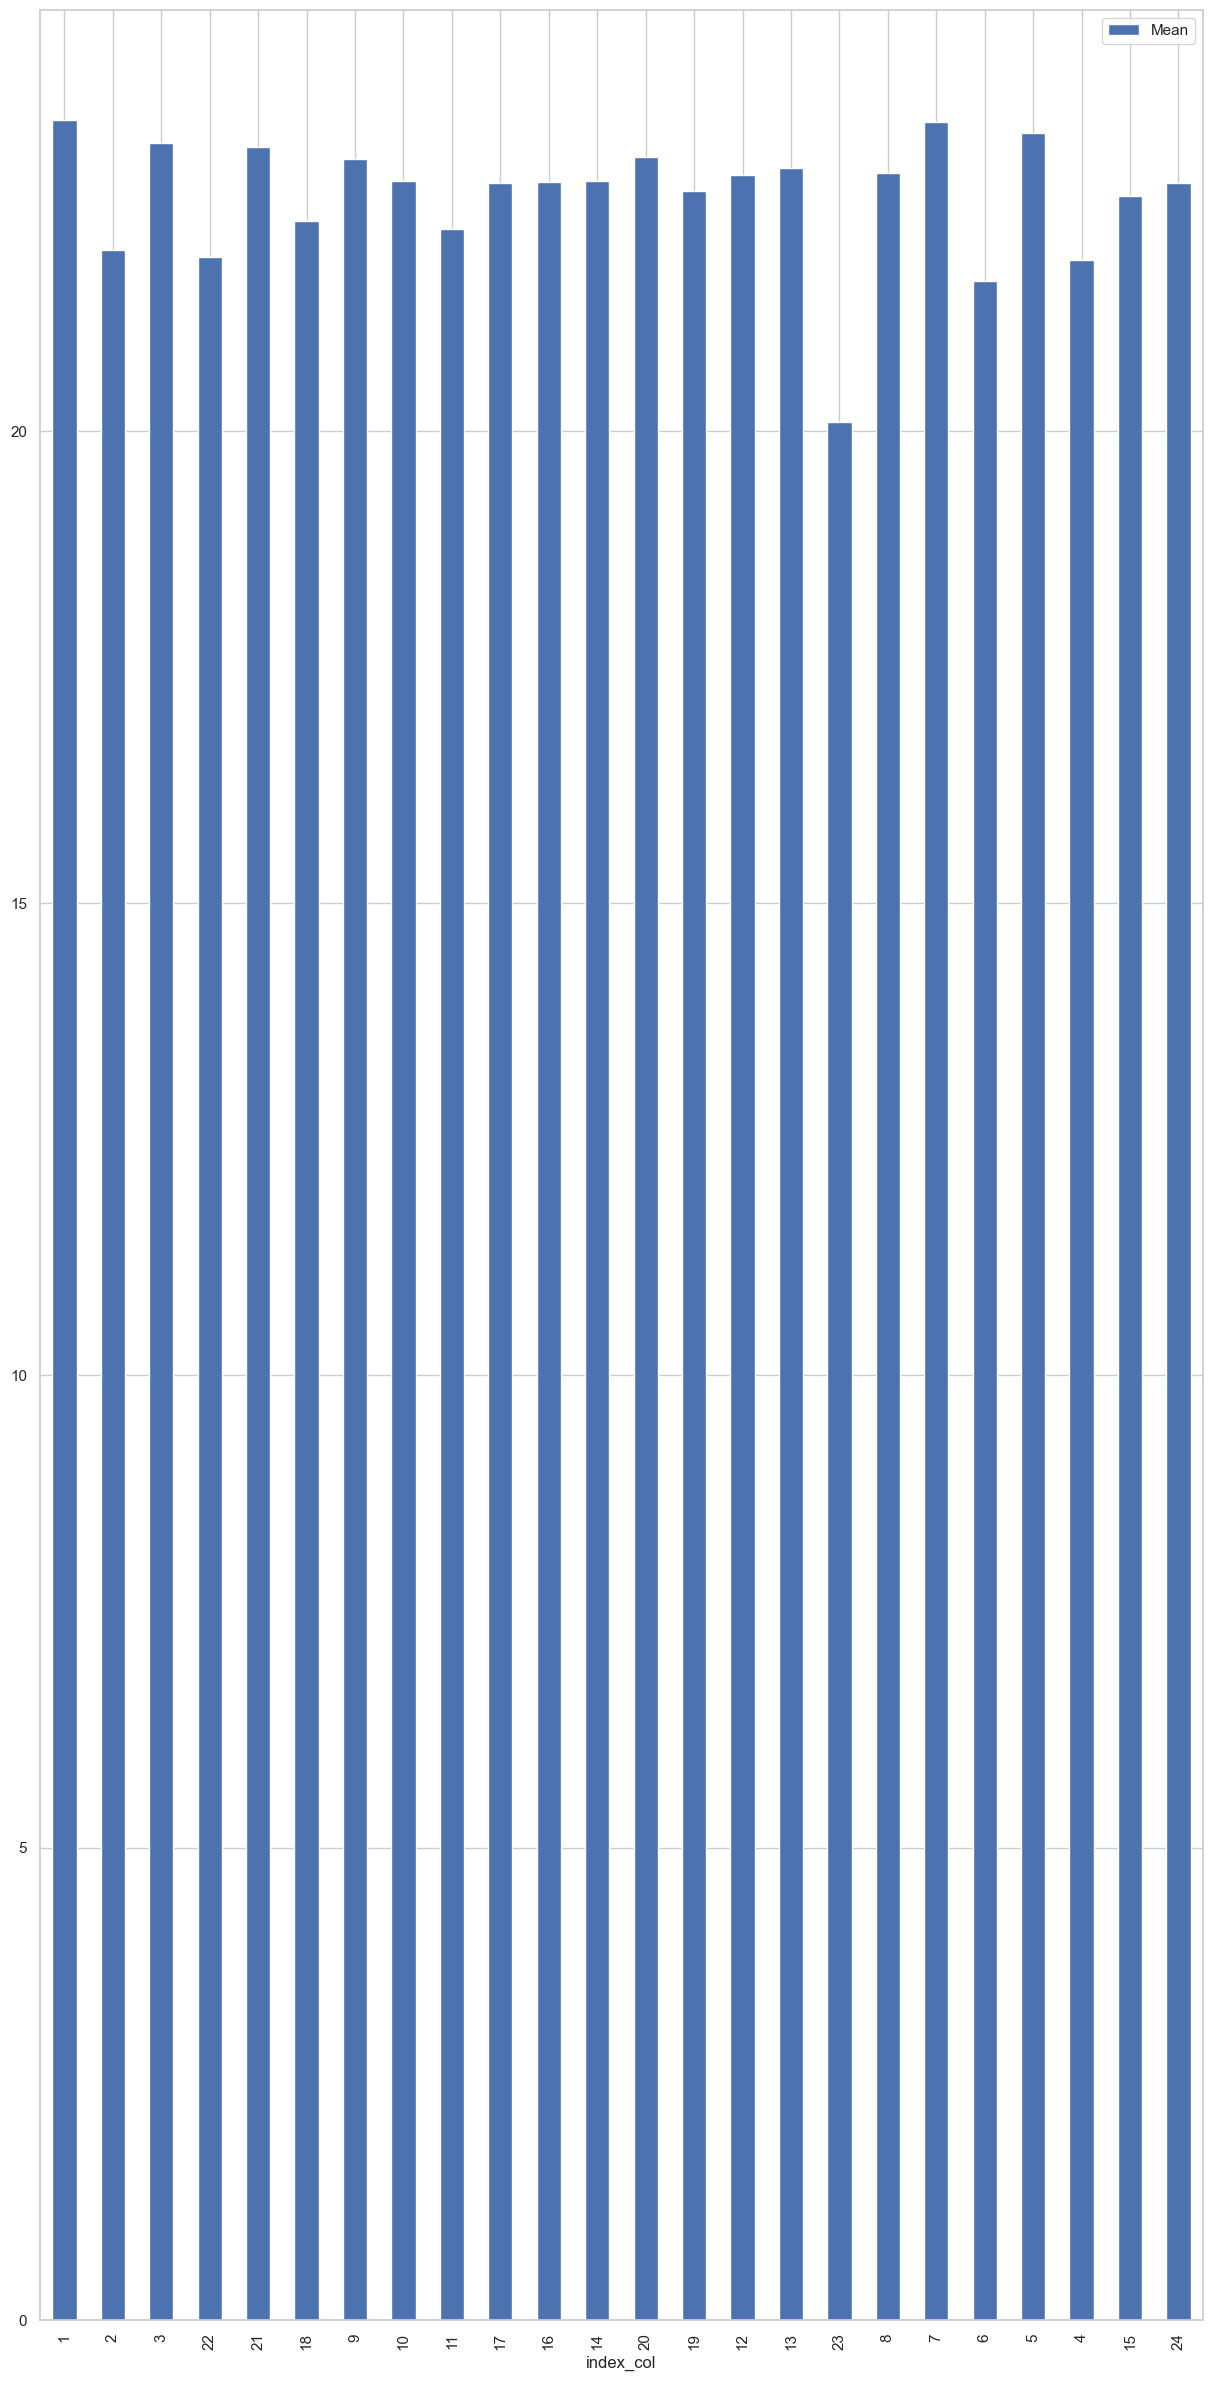

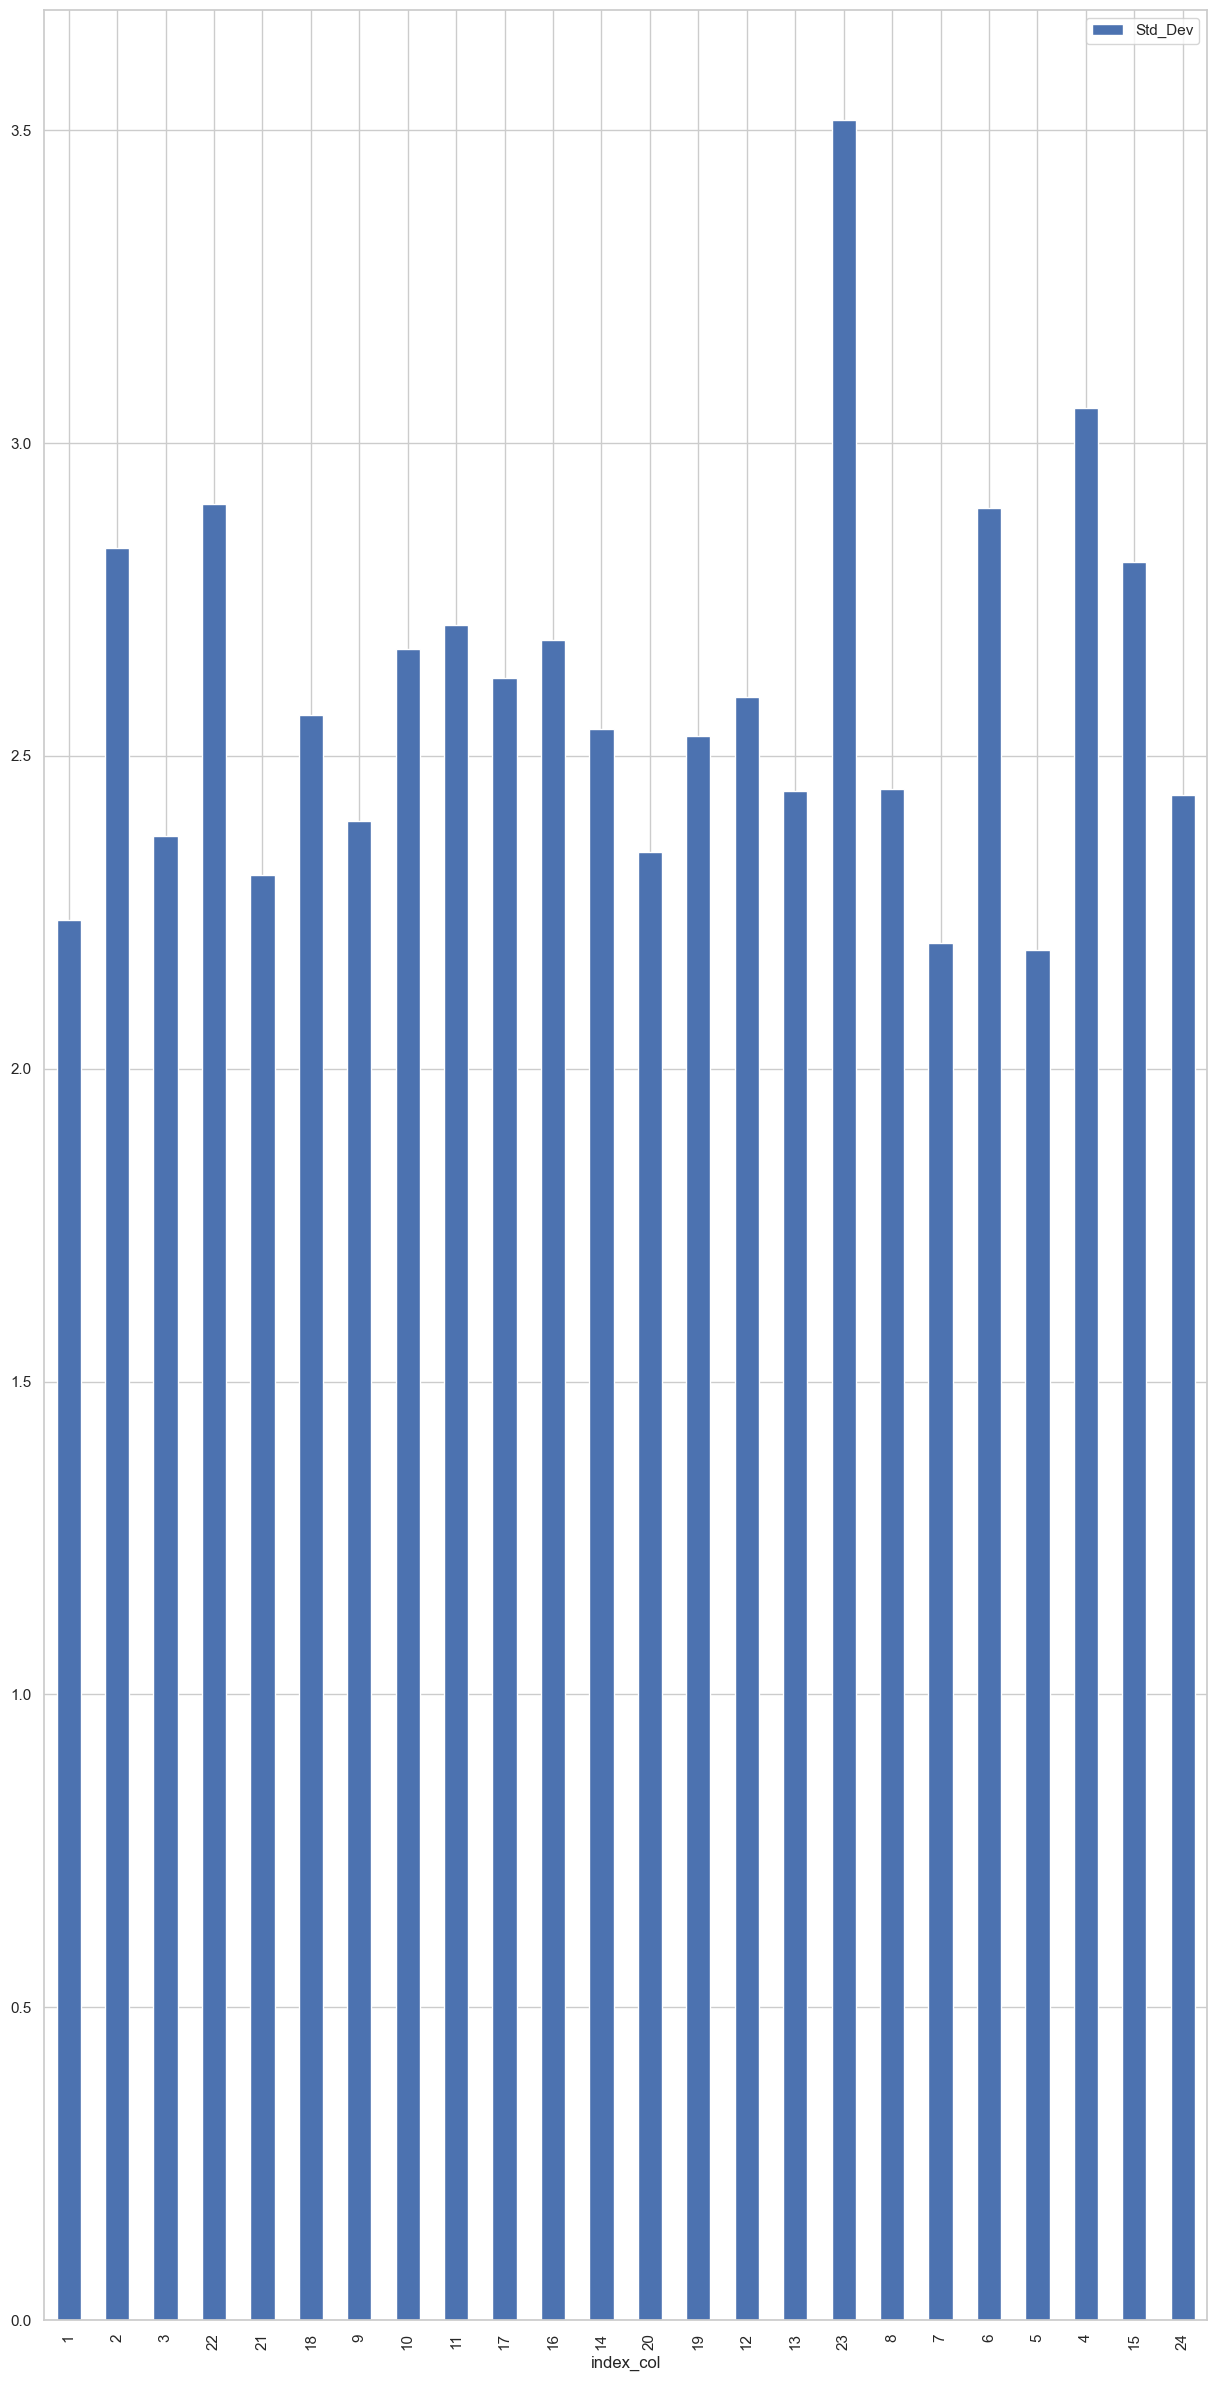

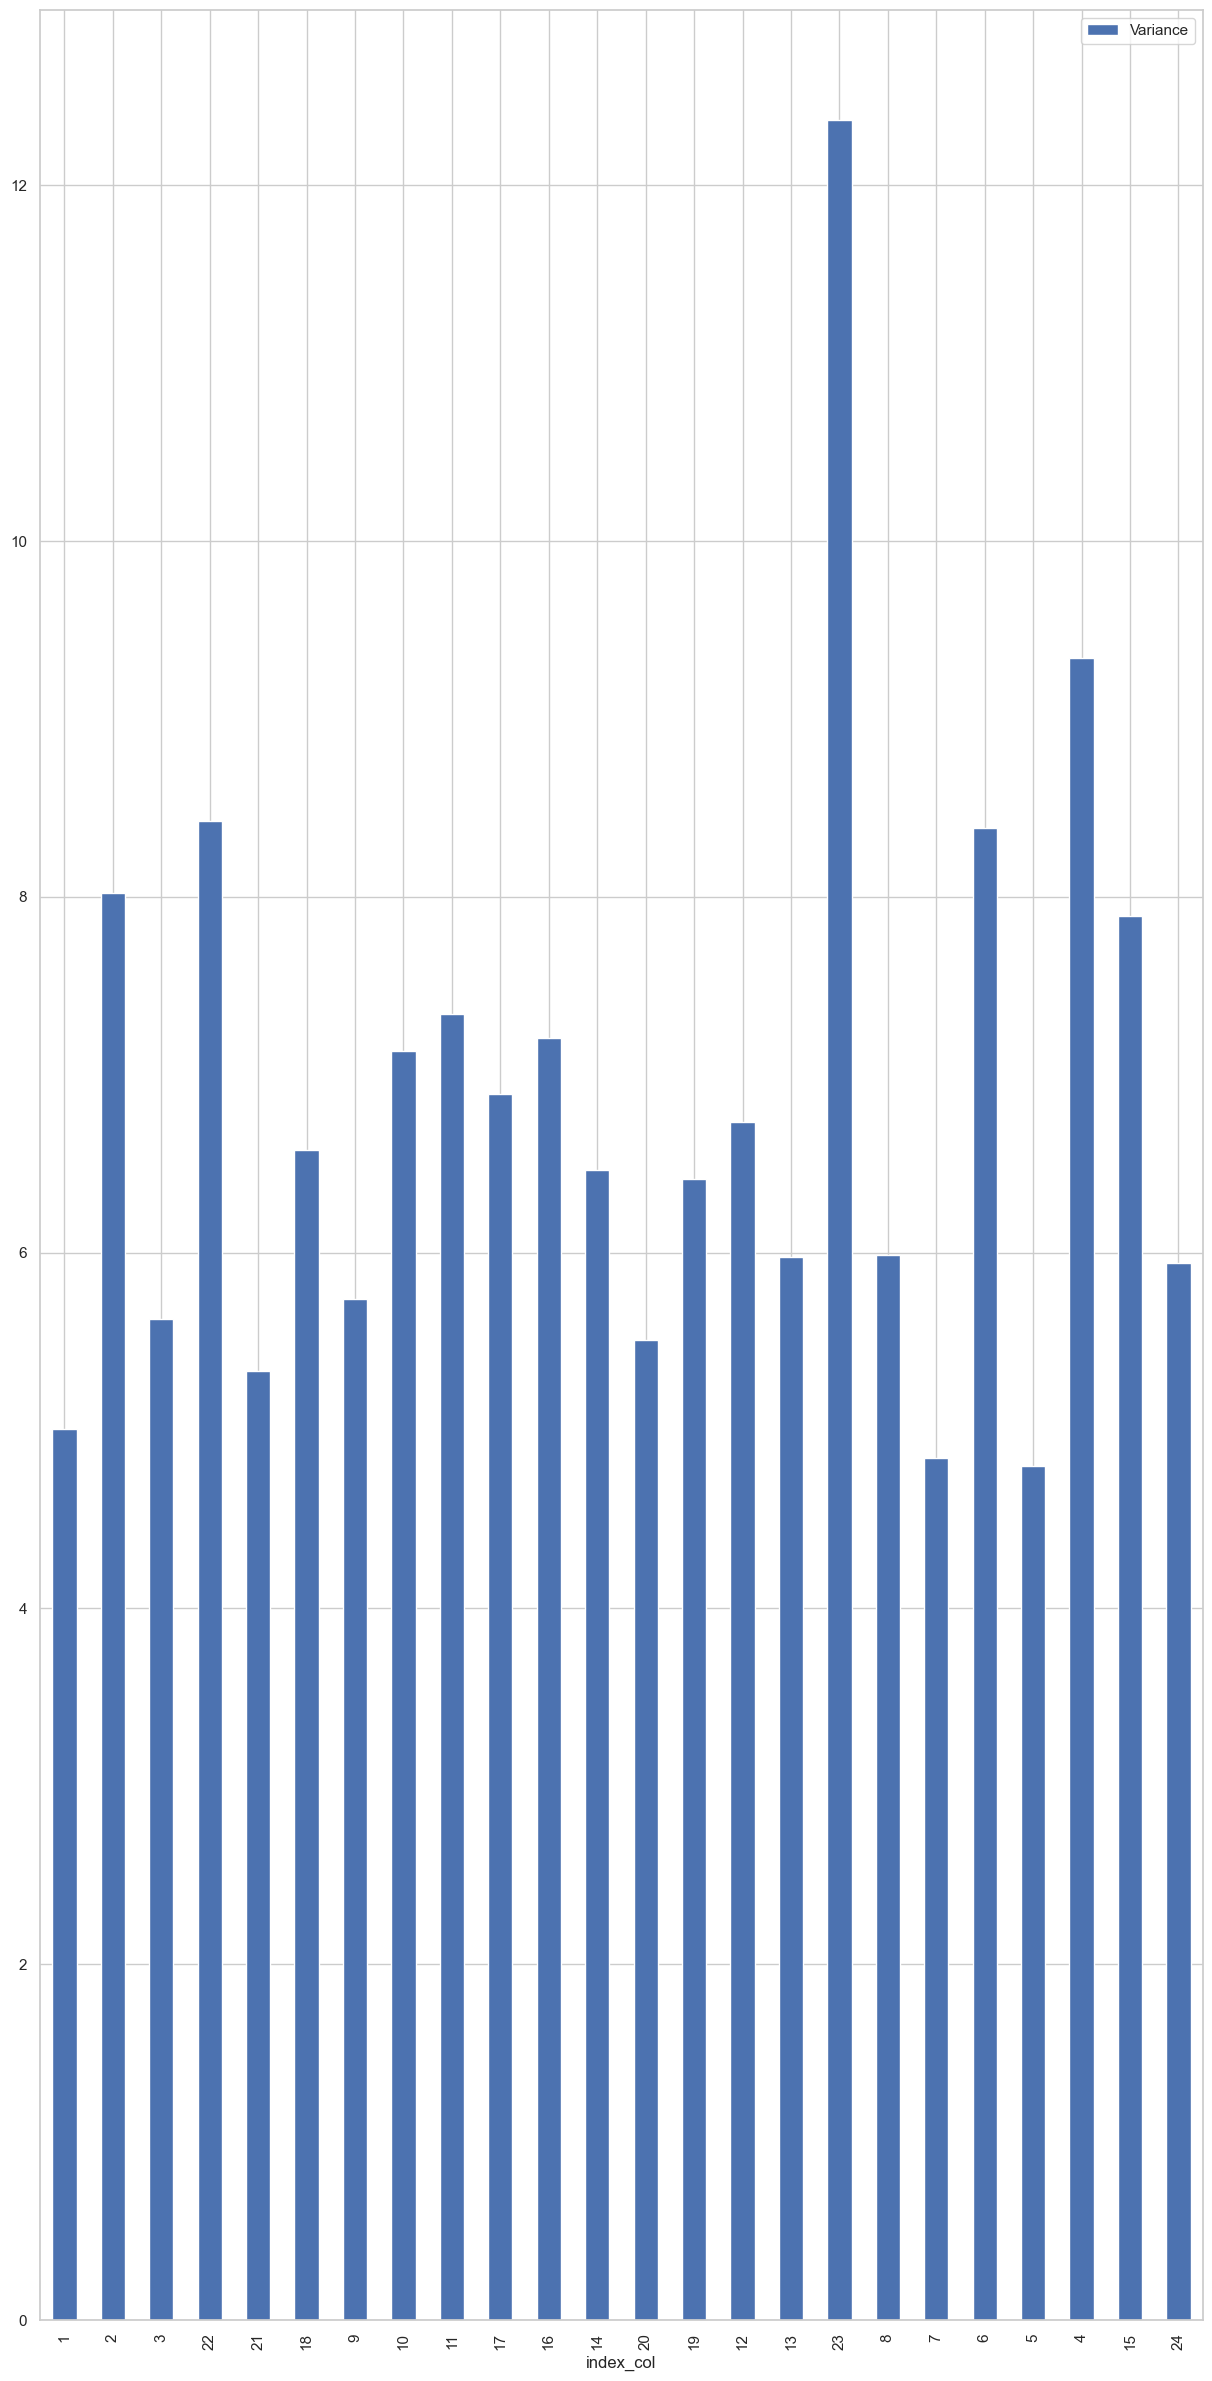

In [15]:
# Stats of subjects

df_genes_for_stats = df_genes.drop(columns=["Gene names"])
df_genes_for_stats = df_genes_for_stats.astype(float)

stats=pd.DataFrame()
stats["Mean"]=df_genes_for_stats.mean(numeric_only=True)
stats["Std_Dev"]=df_genes_for_stats.std(numeric_only=True)
stats["Variance"]=df_genes_for_stats.var(numeric_only=True)

stats = pd.merge(stats, df_labels, left_index=True, right_index=True)
stats['index_col'] = range(1, len(stats) + 1)
stats = stats.sort_values(by=['labels'])
display(stats)

stats.plot(kind='bar',x='index_col' ,y='Mean')
stats.plot(kind='bar',x='index_col' ,y='Std_Dev')
stats.plot(kind='bar',x='index_col' ,y='Variance')

df_healthy = stats[stats["labels"] == "Healthy"]
df_patients = stats[stats["labels"] == "Patient"]


In [16]:
genes = df["Gene names"]
df_gen_index = df.fillna(value="labels", limit=1)
df_gen_index = df_gen_index.set_index('Gene names')
df_transposed = df_gen_index.transpose()

df_healthy = df_transposed[df_transposed['labels'] == "Healthy"]
df_healthy = df_healthy.drop(columns=["labels"])
df_healthy = df_healthy.astype(float)
df_healthy.loc['healthy_mean'] = df_healthy.mean()
df_healthy.loc['healthy_std'] = df_healthy.std()
df_healthy.loc['healthy_var'] = df_healthy.var()
df_healthy = df_healthy.transpose()

df_patients = df_transposed[df_transposed['labels'] == "Patient"]
df_patients = df_patients.drop(columns=["labels"])
df_patients = df_patients.astype(float)
df_patients.loc['patients_mean'] = df_patients.mean()
df_patients.loc['patients_std'] = df_patients.std()
df_patients.loc['patients_var'] = df_patients.var()
df_patients = df_patients.transpose()

merged_df = pd.merge(df_patients, df_healthy, left_index=True, right_index=True)
merged_df = merged_df[["healthy_mean", 'healthy_std', 'healthy_var', 'patients_mean', 'patients_std', 'patients_var']]

merged_df['delta_mean'] = abs(merged_df['healthy_mean'] - merged_df['patients_mean'])
merged_df['delta_std'] = abs(merged_df['healthy_std'] - merged_df['patients_std'])
merged_df['delta_var'] = abs(merged_df['healthy_var'] - merged_df['patients_var'])

merged_df['add_std'] = abs(merged_df['healthy_std'] + merged_df['patients_std'])
merged_df['add_var'] = abs(merged_df['healthy_var'] + merged_df['patients_var'])

merged_df['score_std'] = abs ( merged_df['delta_mean'] - merged_df['add_std'] )
merged_df['score_var'] = abs ( merged_df['delta_mean'] - merged_df['add_var'] )


largest_delta_means = merged_df.nlargest(30, 'delta_mean')
genes_with_highest_delta_means = list(largest_delta_means.index)
largest_delta_stds = merged_df.nlargest(30, 'delta_std')
genes_with_highest_delta_stds = list(largest_delta_stds.index)
largest_delta_vars = merged_df.nlargest(30, 'delta_var')
genes_with_highest_delta_vars = list(largest_delta_vars.index)

smallest_added_stds = merged_df.nsmallest(30, 'add_std')
genes_with_smallest_added_stds = list(smallest_added_stds.index)
smallest_added_vars = merged_df.nsmallest(30, 'add_var')
genes_with_smallest_added_vars = list(smallest_added_vars.index)

best_scores_std = merged_df.nlargest(30, 'score_std')
genes_with_best_scores_std = list(best_scores_std.index)
best_scores_var = merged_df.nlargest(30, 'score_var')
genes_with_best_scores_vars = list(best_scores_var.index)

comp_mean_std= set(genes_with_highest_delta_means) & set(genes_with_highest_delta_stds)
comp_mean_var= set(genes_with_highest_delta_means) & set(genes_with_highest_delta_vars)
comp_var_std= set(genes_with_highest_delta_stds) & set(genes_with_highest_delta_vars)
print(f"Matches between mean and std: {comp_mean_std}")
print(f"Matches between mean and var: {comp_mean_var}")
print(f"Matches between std and var: {comp_var_std}")

print("__________________________________________________________________________________________________________________________________")
nine_protein_classifier = ["ENPP3","IVL","S100A2","MYH11","SERPINB5","NNMT","CLCA4","CD109","S100A14"]
print(f"Matches between mean and std: {set(comp_mean_std) & set(nine_protein_classifier)}")
print(f"Matches between mean and var: {set(comp_mean_var) & set(nine_protein_classifier)}")
print(f"Matches between std and var: {set(comp_var_std) & set(nine_protein_classifier)}")

Matches between mean and std: {'DSG3', 'SPRR3', 'GLUL', 'CLCA4', 'SBSN', 'DSC2', 'CEACAM5'}
Matches between mean and var: {'DPYD', 'DSG3', 'SERPINB5', 'S100P', 'SERPINB13', 'HLA-A', 'IVL', 'LGALS7', 'OLFM4', 'S100A9', 'S100A8', 'SPRR3', 'SBSN', 'KNG1', 'CEACAM5', 'GLUL', 'SDCBP', 'SERPINB3', 'S100A14', 'CLCA4', 'S100A2', 'HK1', 'DSC2'}
Matches between std and var: {'DSG3', 'SPRR3', 'GLUL', 'CLCA4', 'SBSN', 'DSC2', 'CEACAM5'}
__________________________________________________________________________________________________________________________________
Matches between mean and std: {'CLCA4'}
Matches between mean and var: {'SERPINB5', 'S100A14', 'CLCA4', 'S100A2', 'IVL'}
Matches between std and var: {'CLCA4'}


In [17]:
# Generate plot for means

def generate_scatter_plot_for_list(genes_with_highest_delta_x, title):
    df_selected = df_transposed[genes_with_highest_delta_x]
    merged_labels_selected = pd.merge(df_selected, df_labels, left_index=True, right_index=True)

    new_columns = []
    for i in range(0,len(merged_labels_selected.columns)):
        new_columns.append(f"{merged_labels_selected.columns[i]}_{i}")
    merged_labels_selected.columns = new_columns
    
    labels_column = f"labels_{len(merged_labels_selected.columns)-1}"
    labels_list = merged_labels_selected[labels_column].tolist()
    merged_labels_selected = merged_labels_selected.drop(columns=[labels_column])
    gene_intensities_labels_list = []
    for j in range(0,len(merged_labels_selected.columns)):
        gene = merged_labels_selected.columns[j]
        gene_intensities = merged_labels_selected[gene].tolist()
        gene_intensities = [float(i) for i in gene_intensities]


        gene_intensities_labels=pd.DataFrame()
        gene_intensities_labels["gene_intensities"] = gene_intensities
        gene_intensities_labels["labels"] = labels_list
        gene_intensities_labels["gene"] = gene
        gene_intensities_labels_list.append(gene_intensities_labels)

    df_concatenated = pd.concat(gene_intensities_labels_list)

    import seaborn as sns
    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize':(15,30)})
    ax = sns.stripplot(x="gene_intensities", y="gene", hue="labels", data=df_concatenated, linewidth=1,size=10.0)
    ax.tick_params(axis='x', rotation=70)
    ax.set_title(title)
    plt.savefig(f'./{title}.png')


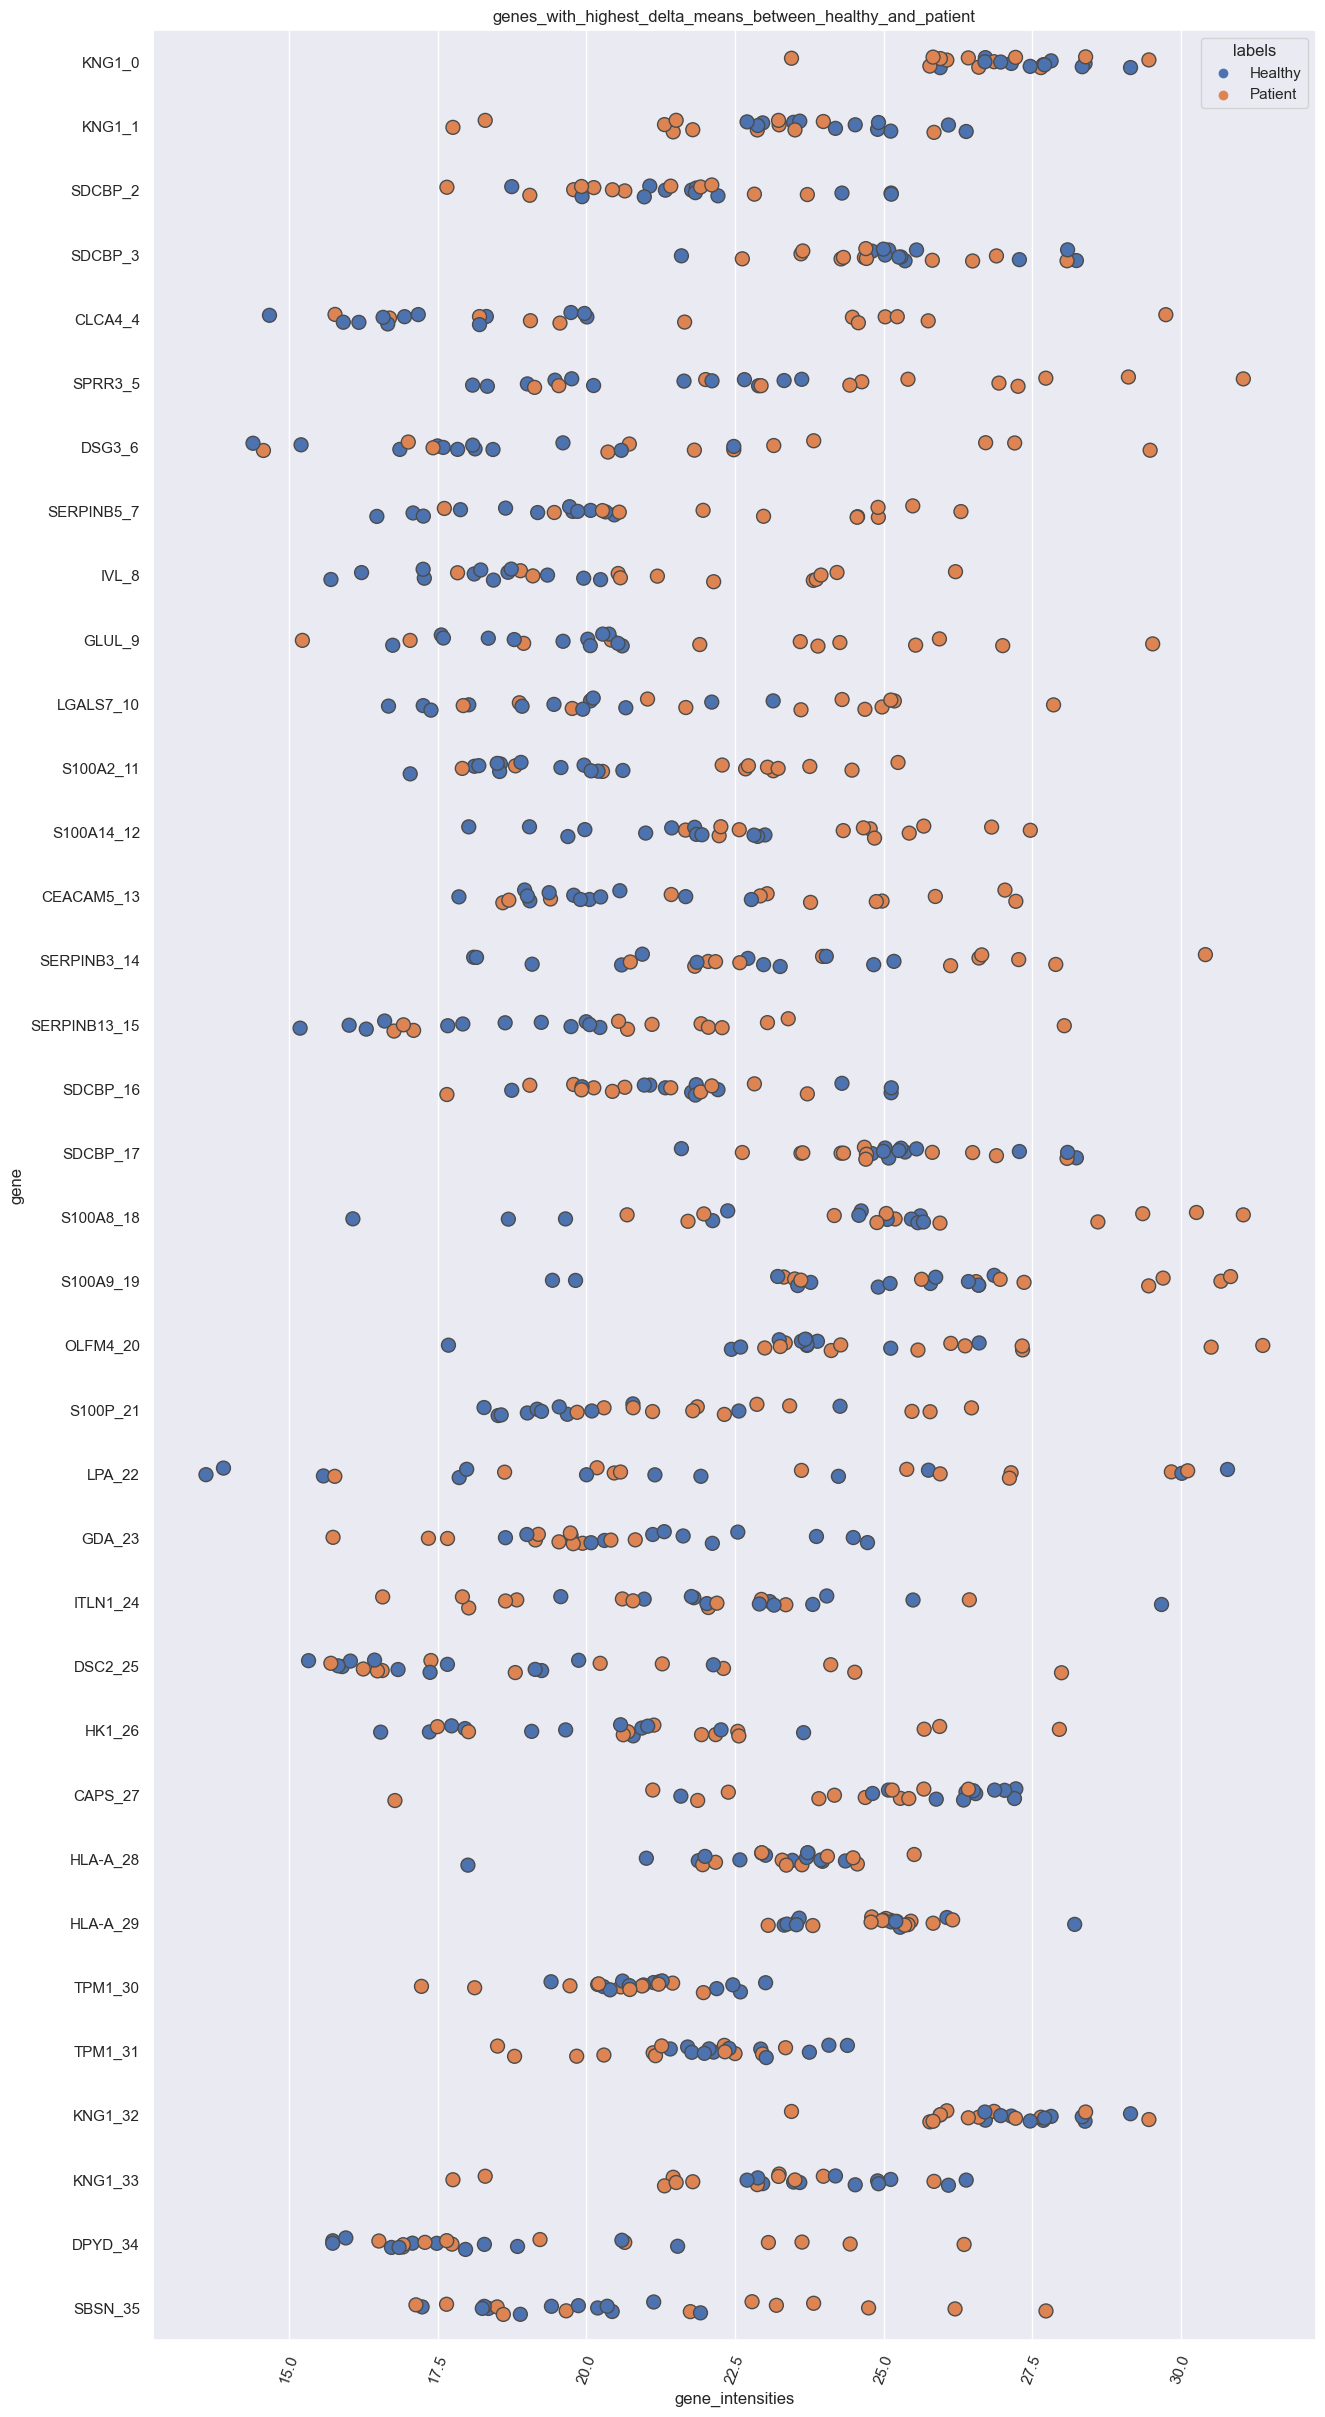

In [18]:
generate_scatter_plot_for_list(genes_with_highest_delta_means, "genes_with_highest_delta_means_between_healthy_and_patient")

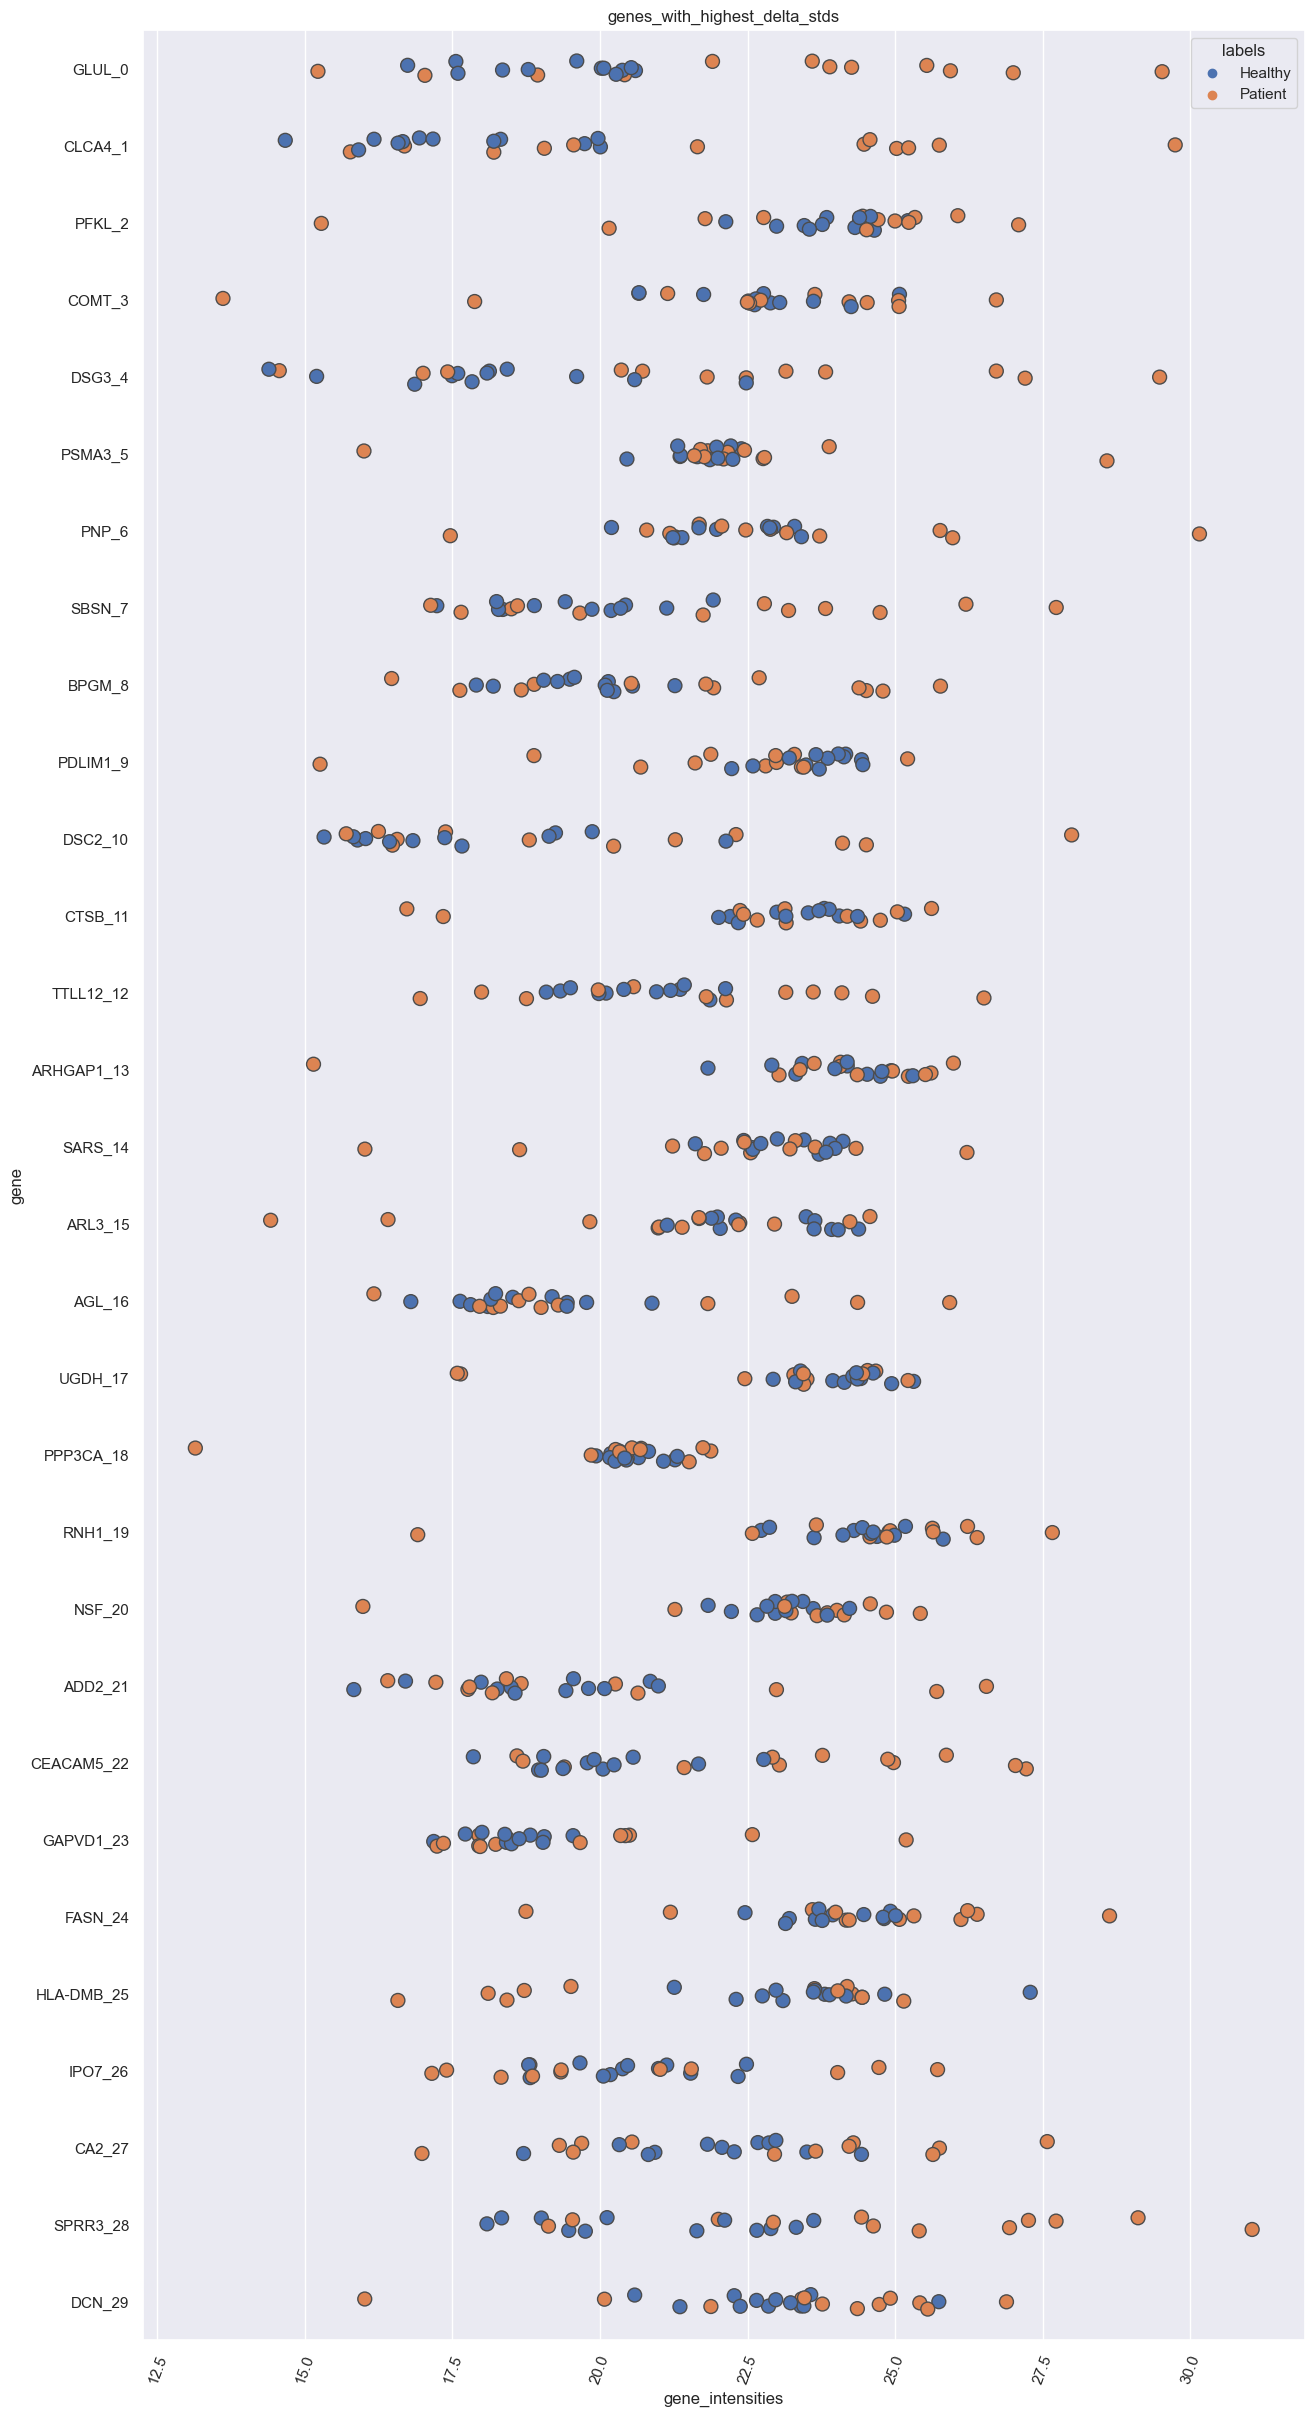

In [19]:
generate_scatter_plot_for_list(genes_with_highest_delta_stds, "genes_with_highest_delta_stds")

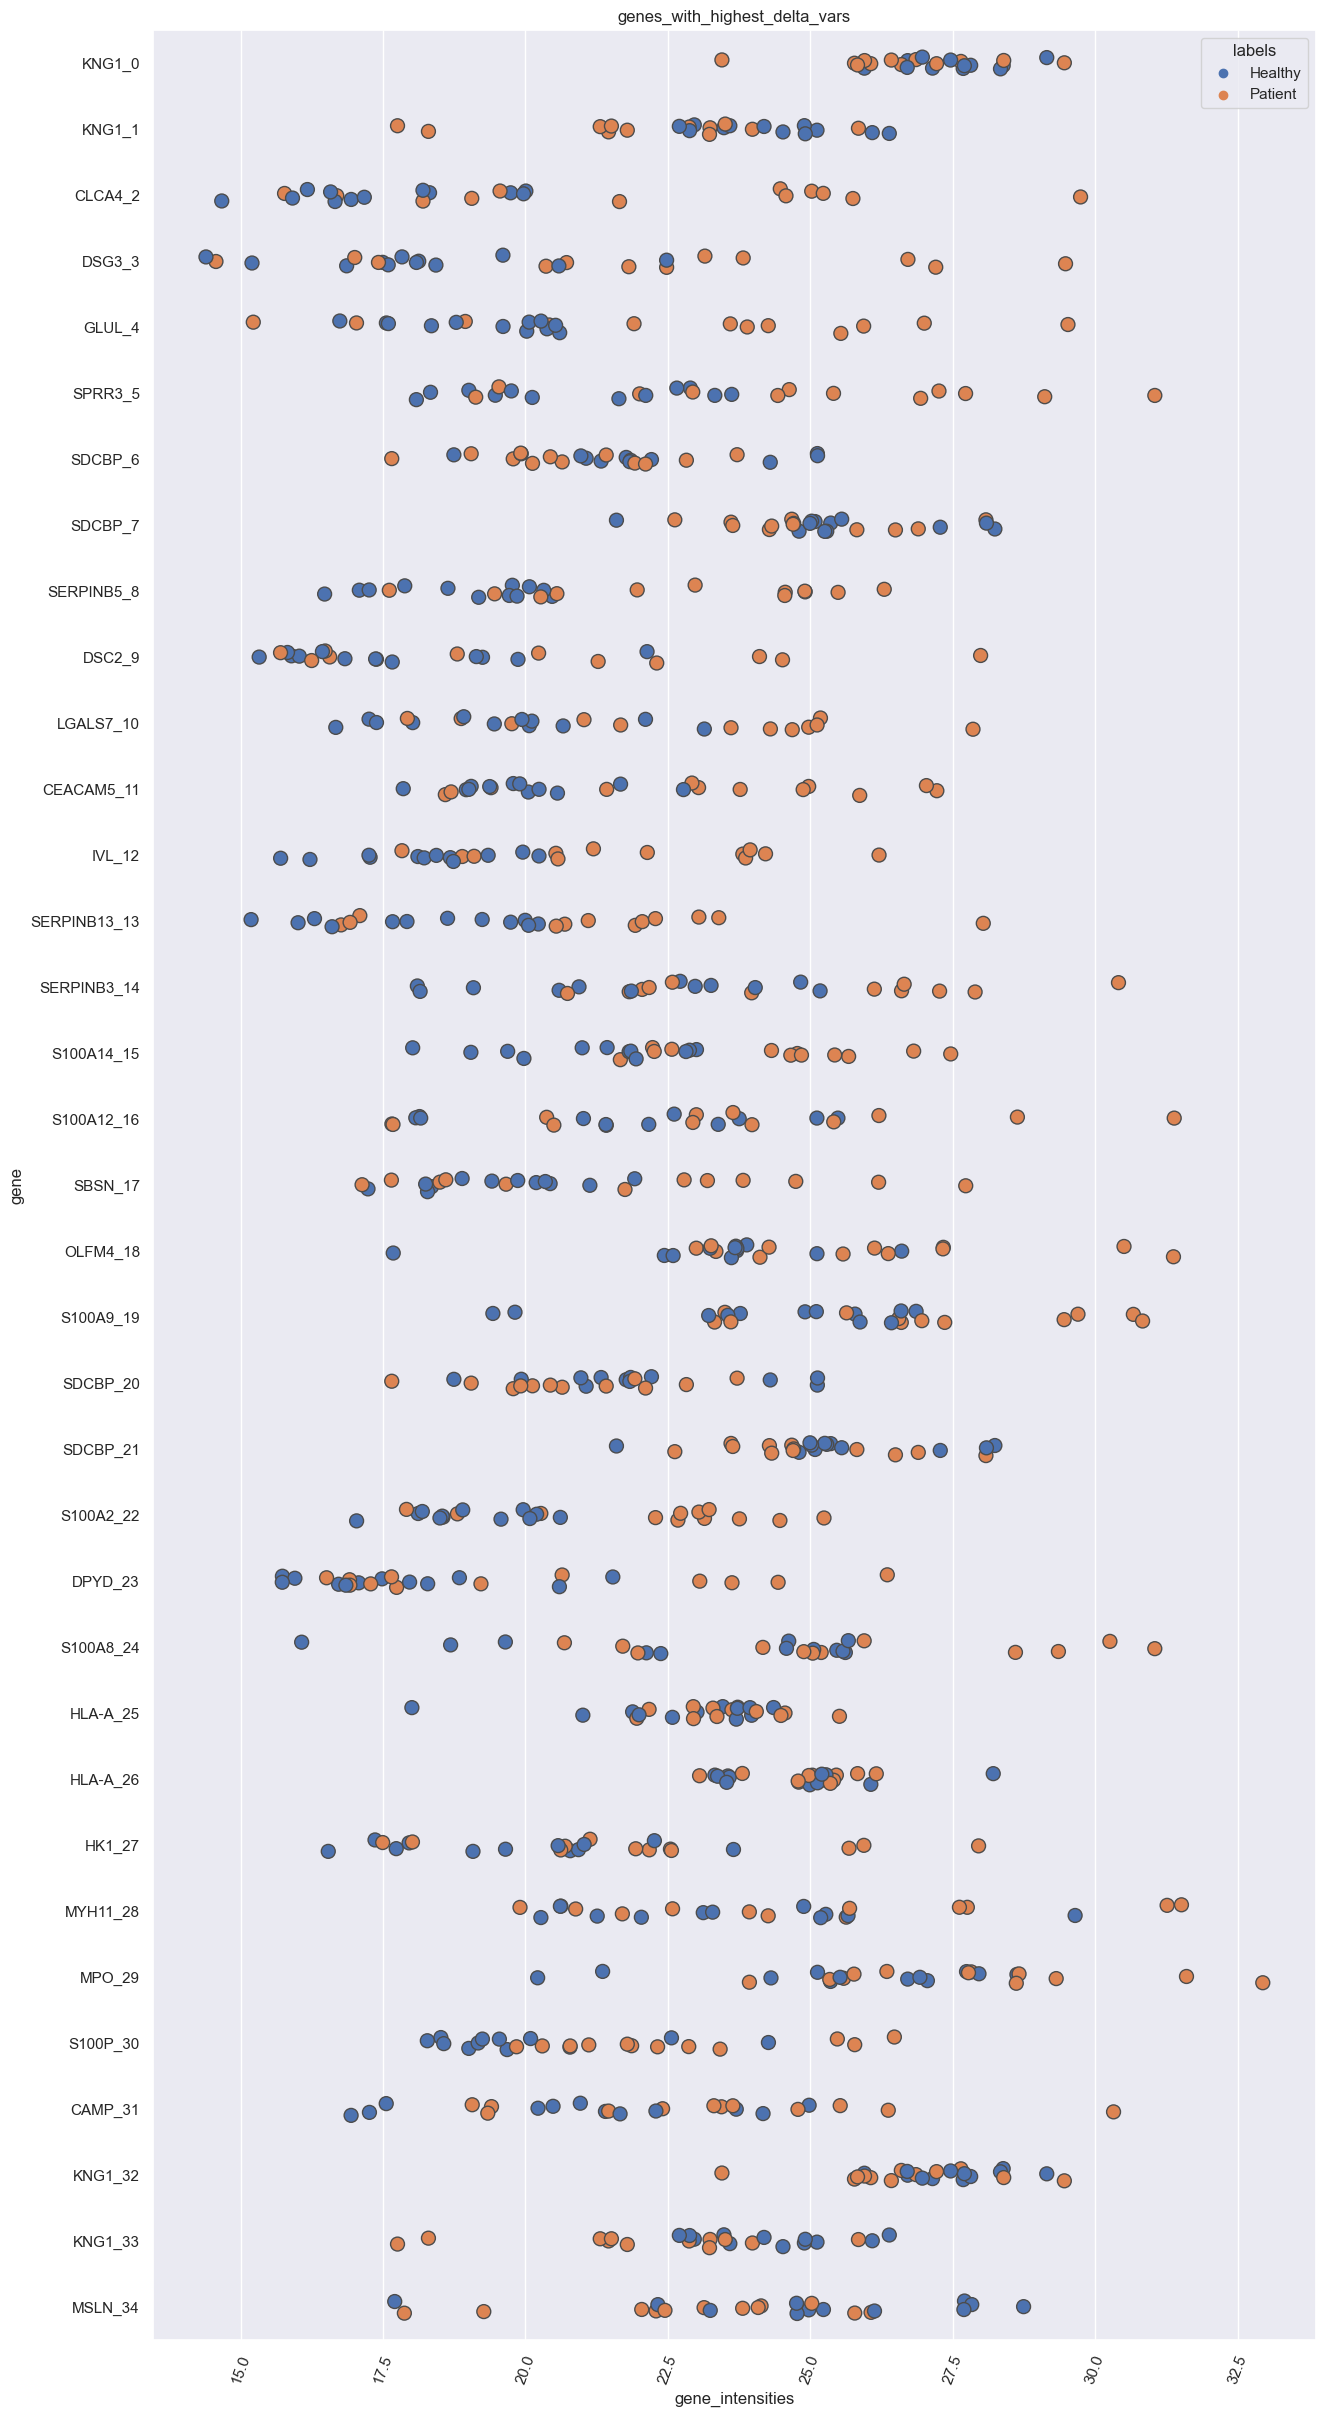

In [20]:
generate_scatter_plot_for_list(genes_with_highest_delta_vars, "genes_with_highest_delta_vars")

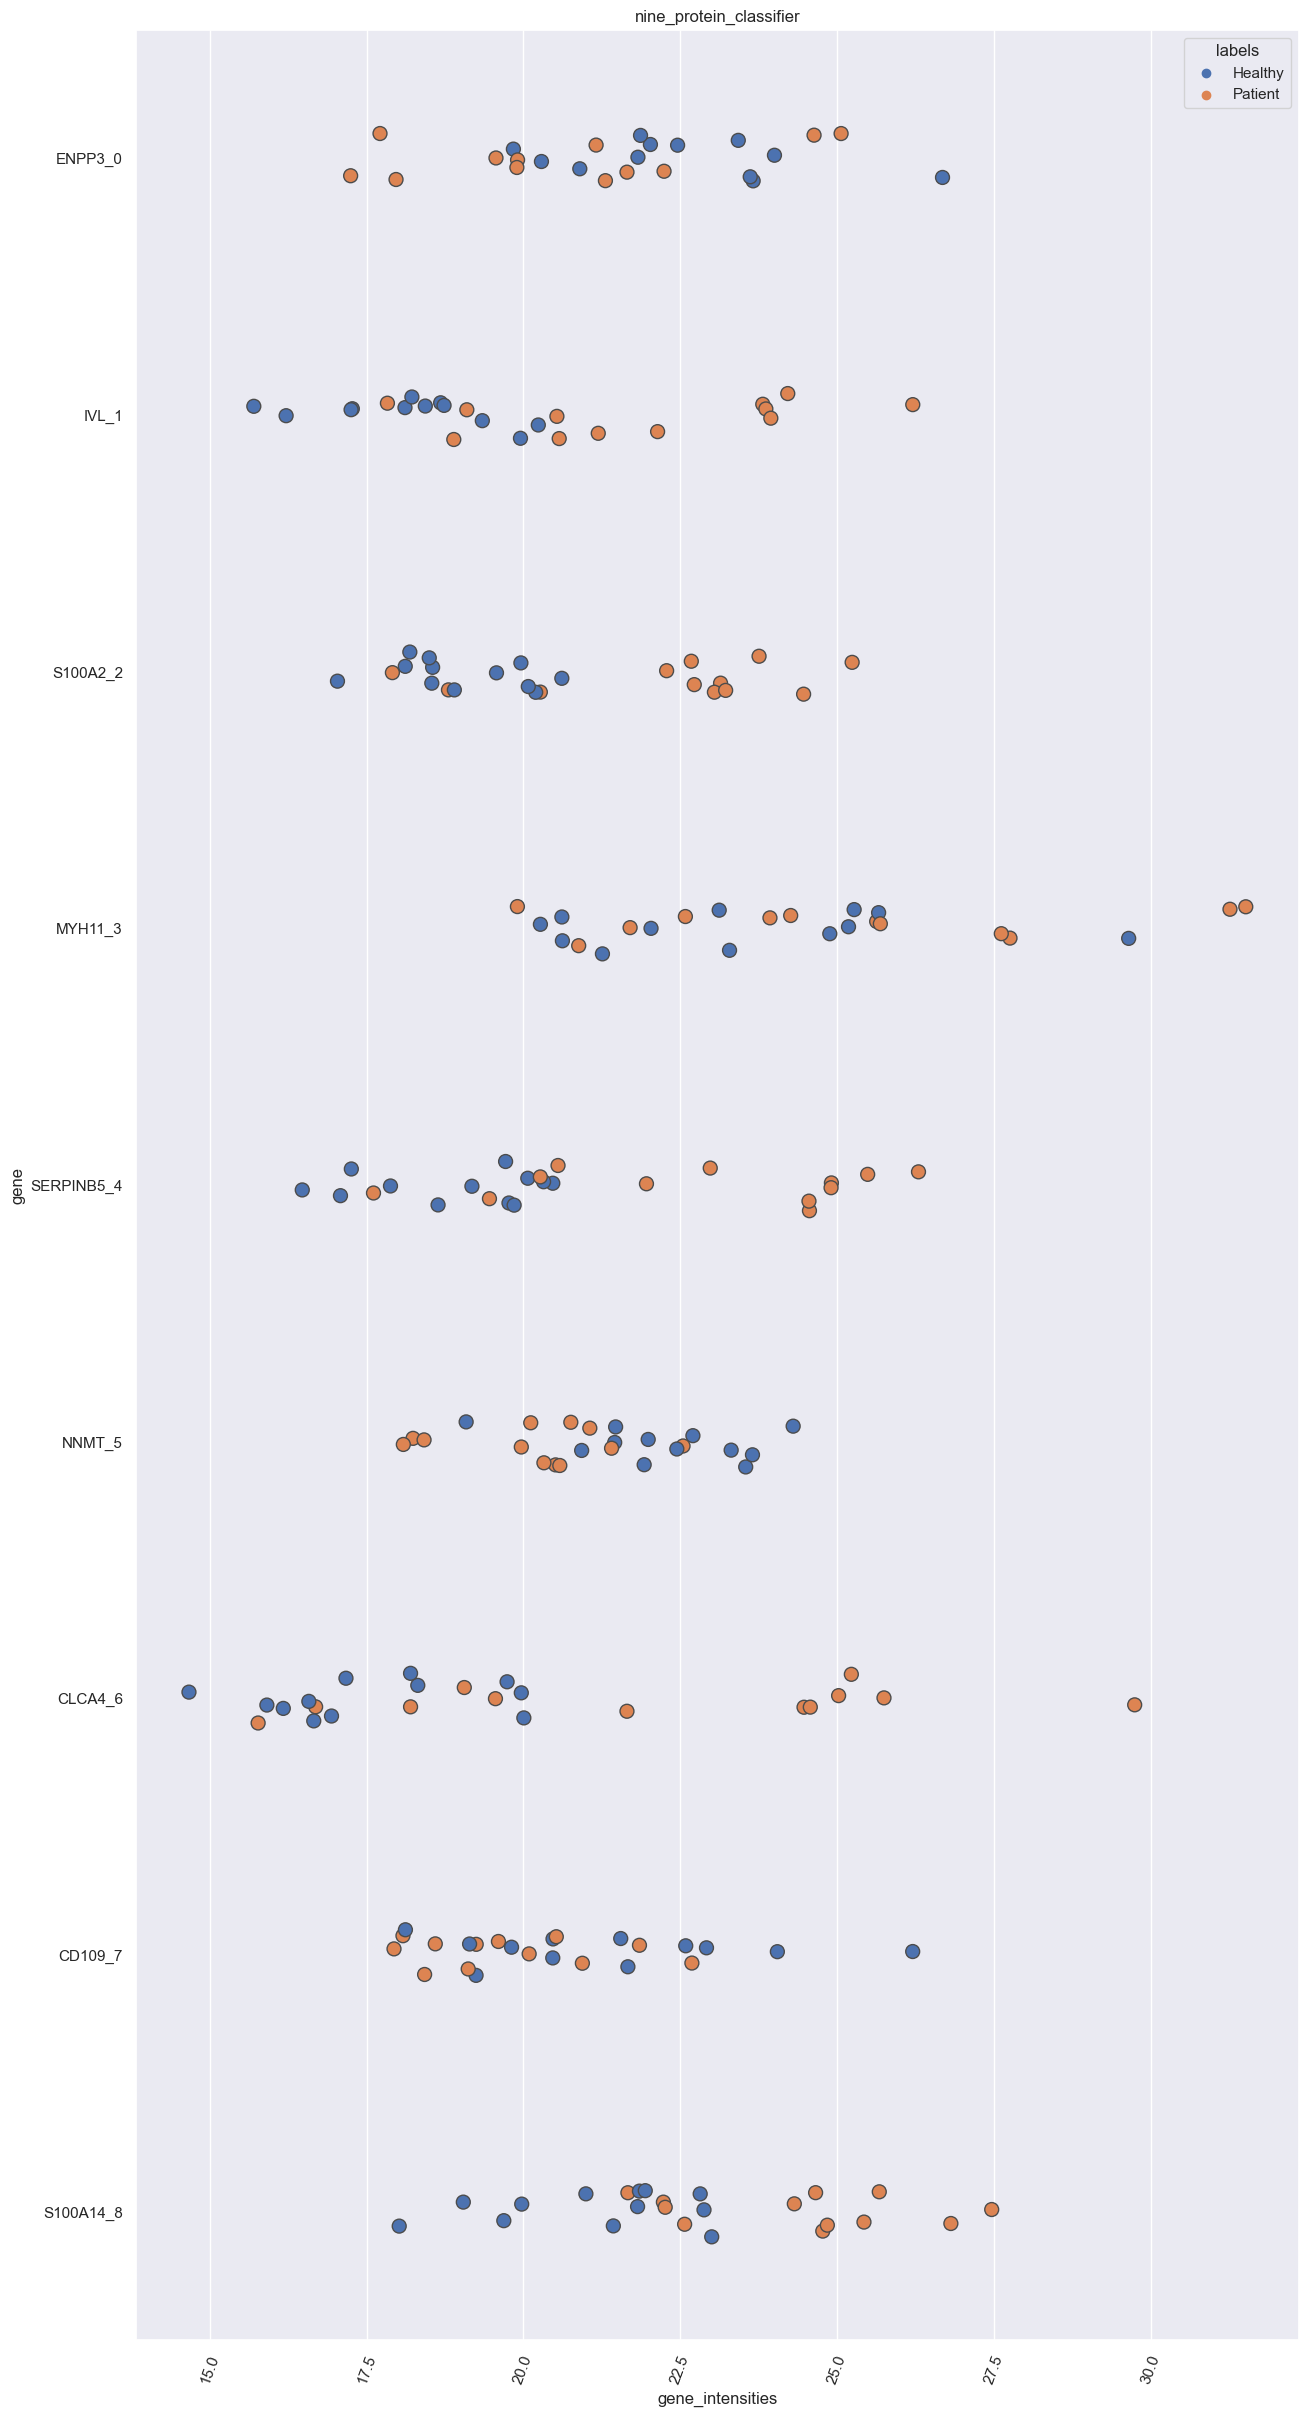

In [21]:
generate_scatter_plot_for_list(nine_protein_classifier, "nine_protein_classifier")

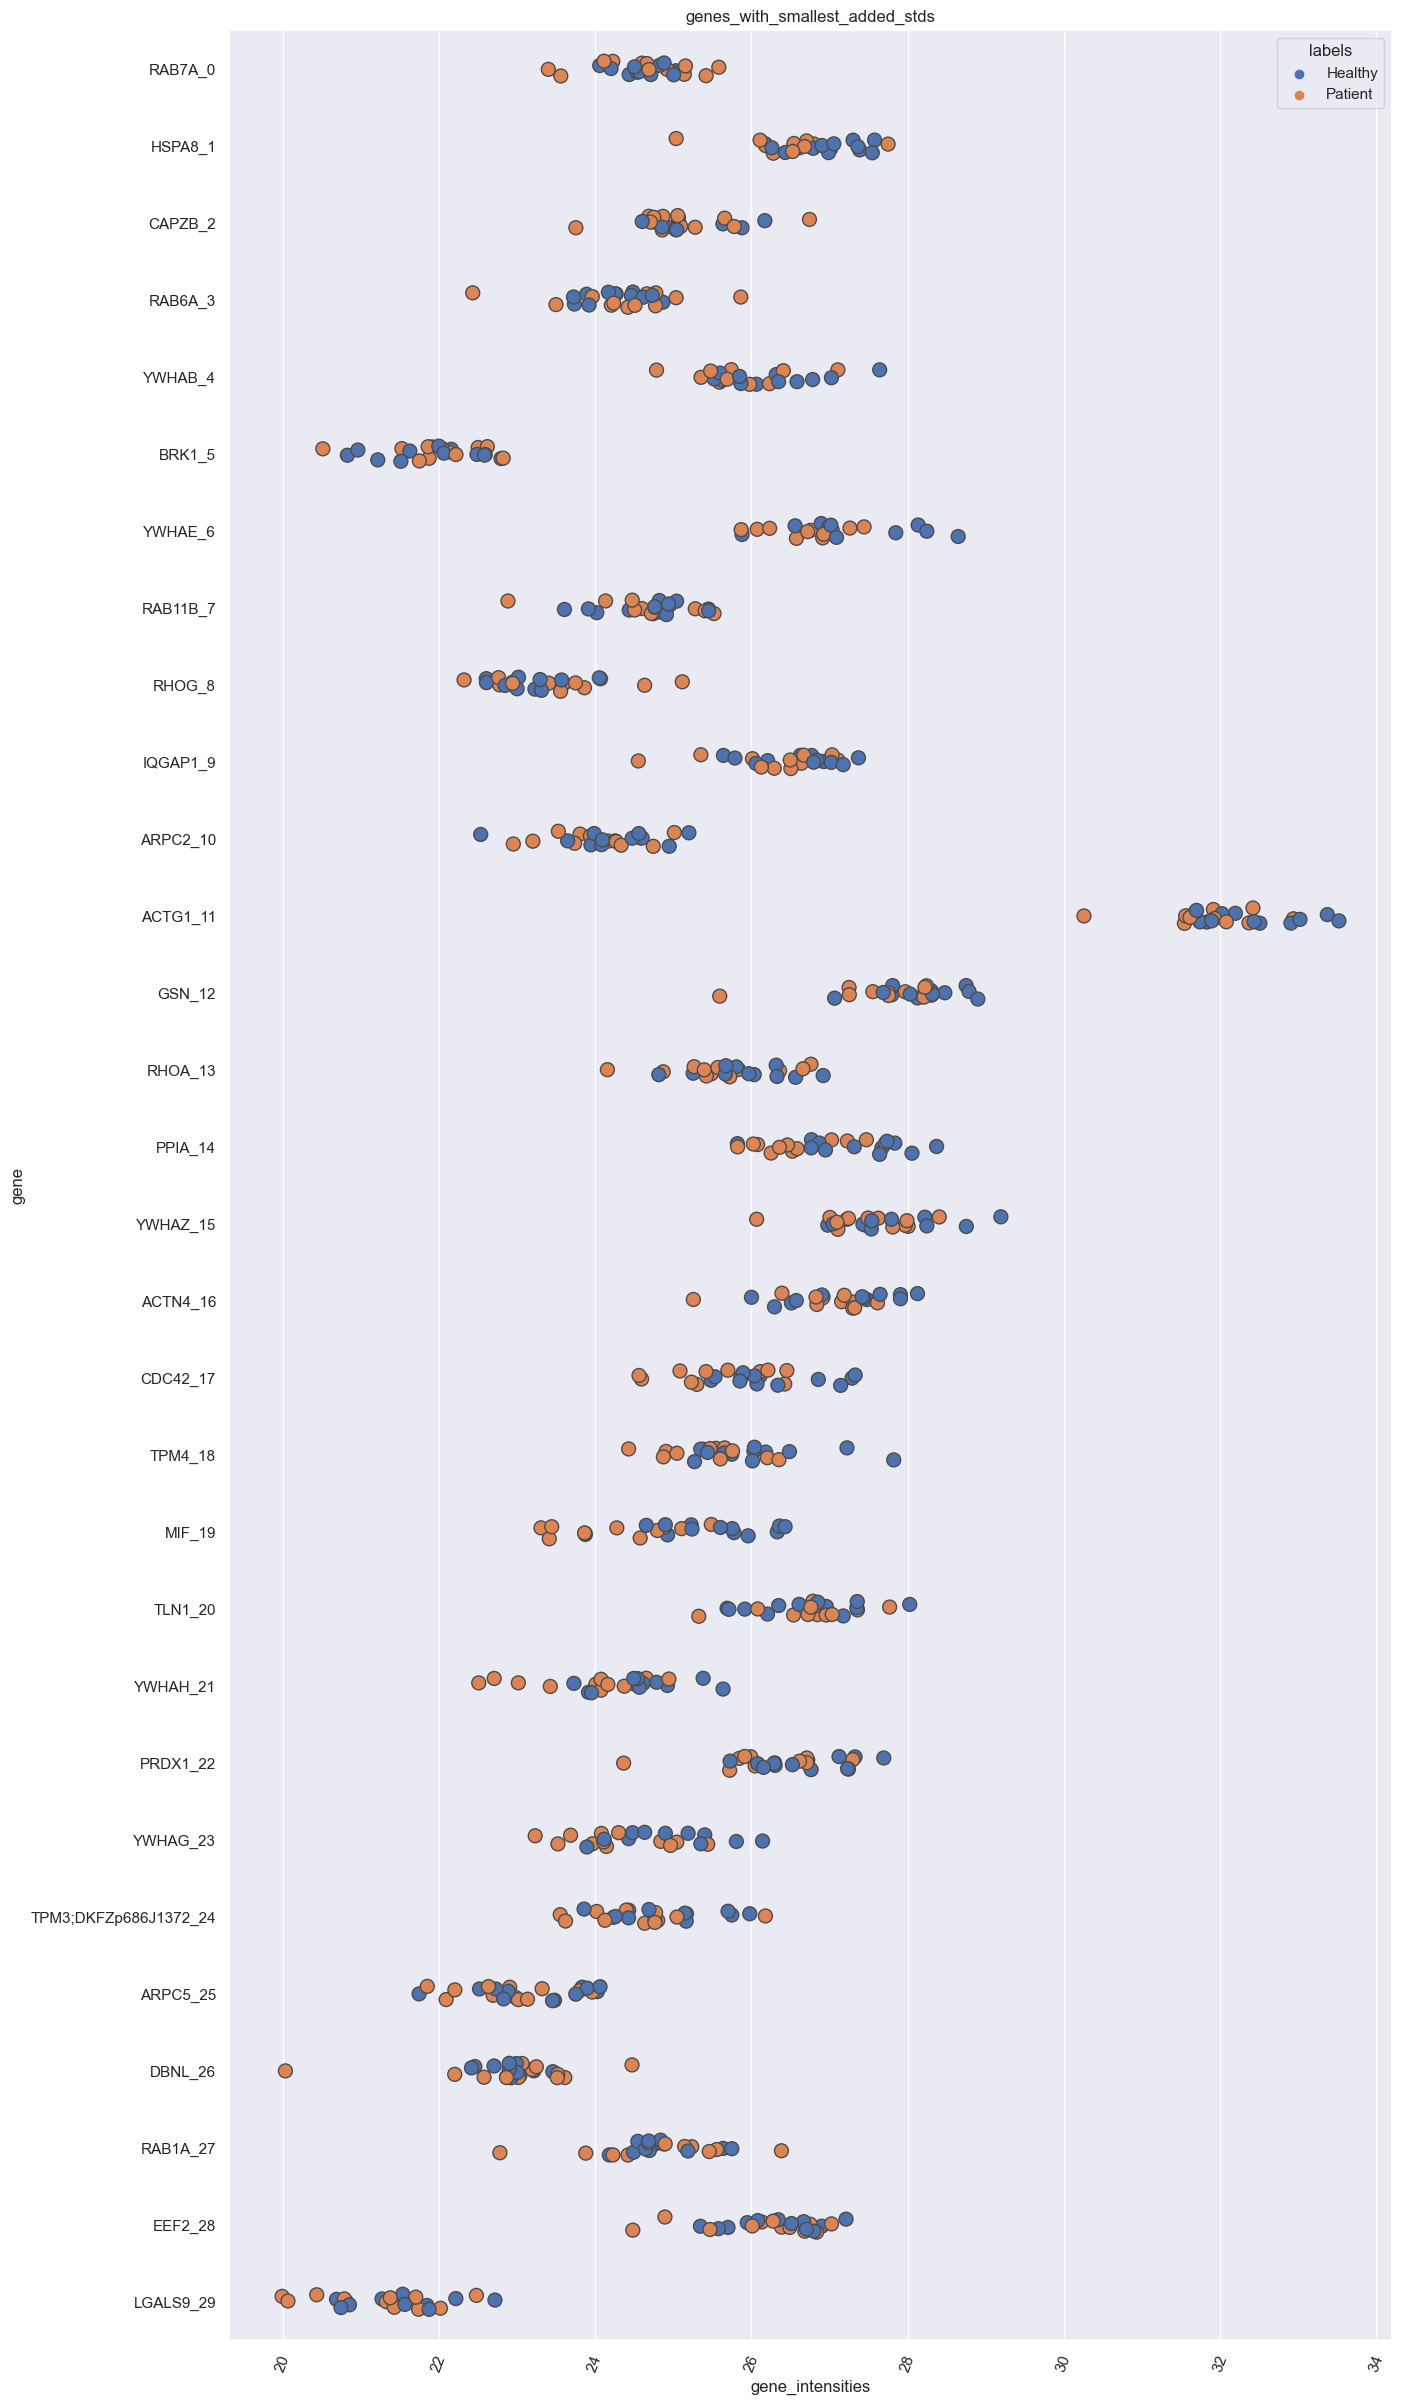

In [22]:
generate_scatter_plot_for_list(genes_with_smallest_added_stds, "genes_with_smallest_added_stds")

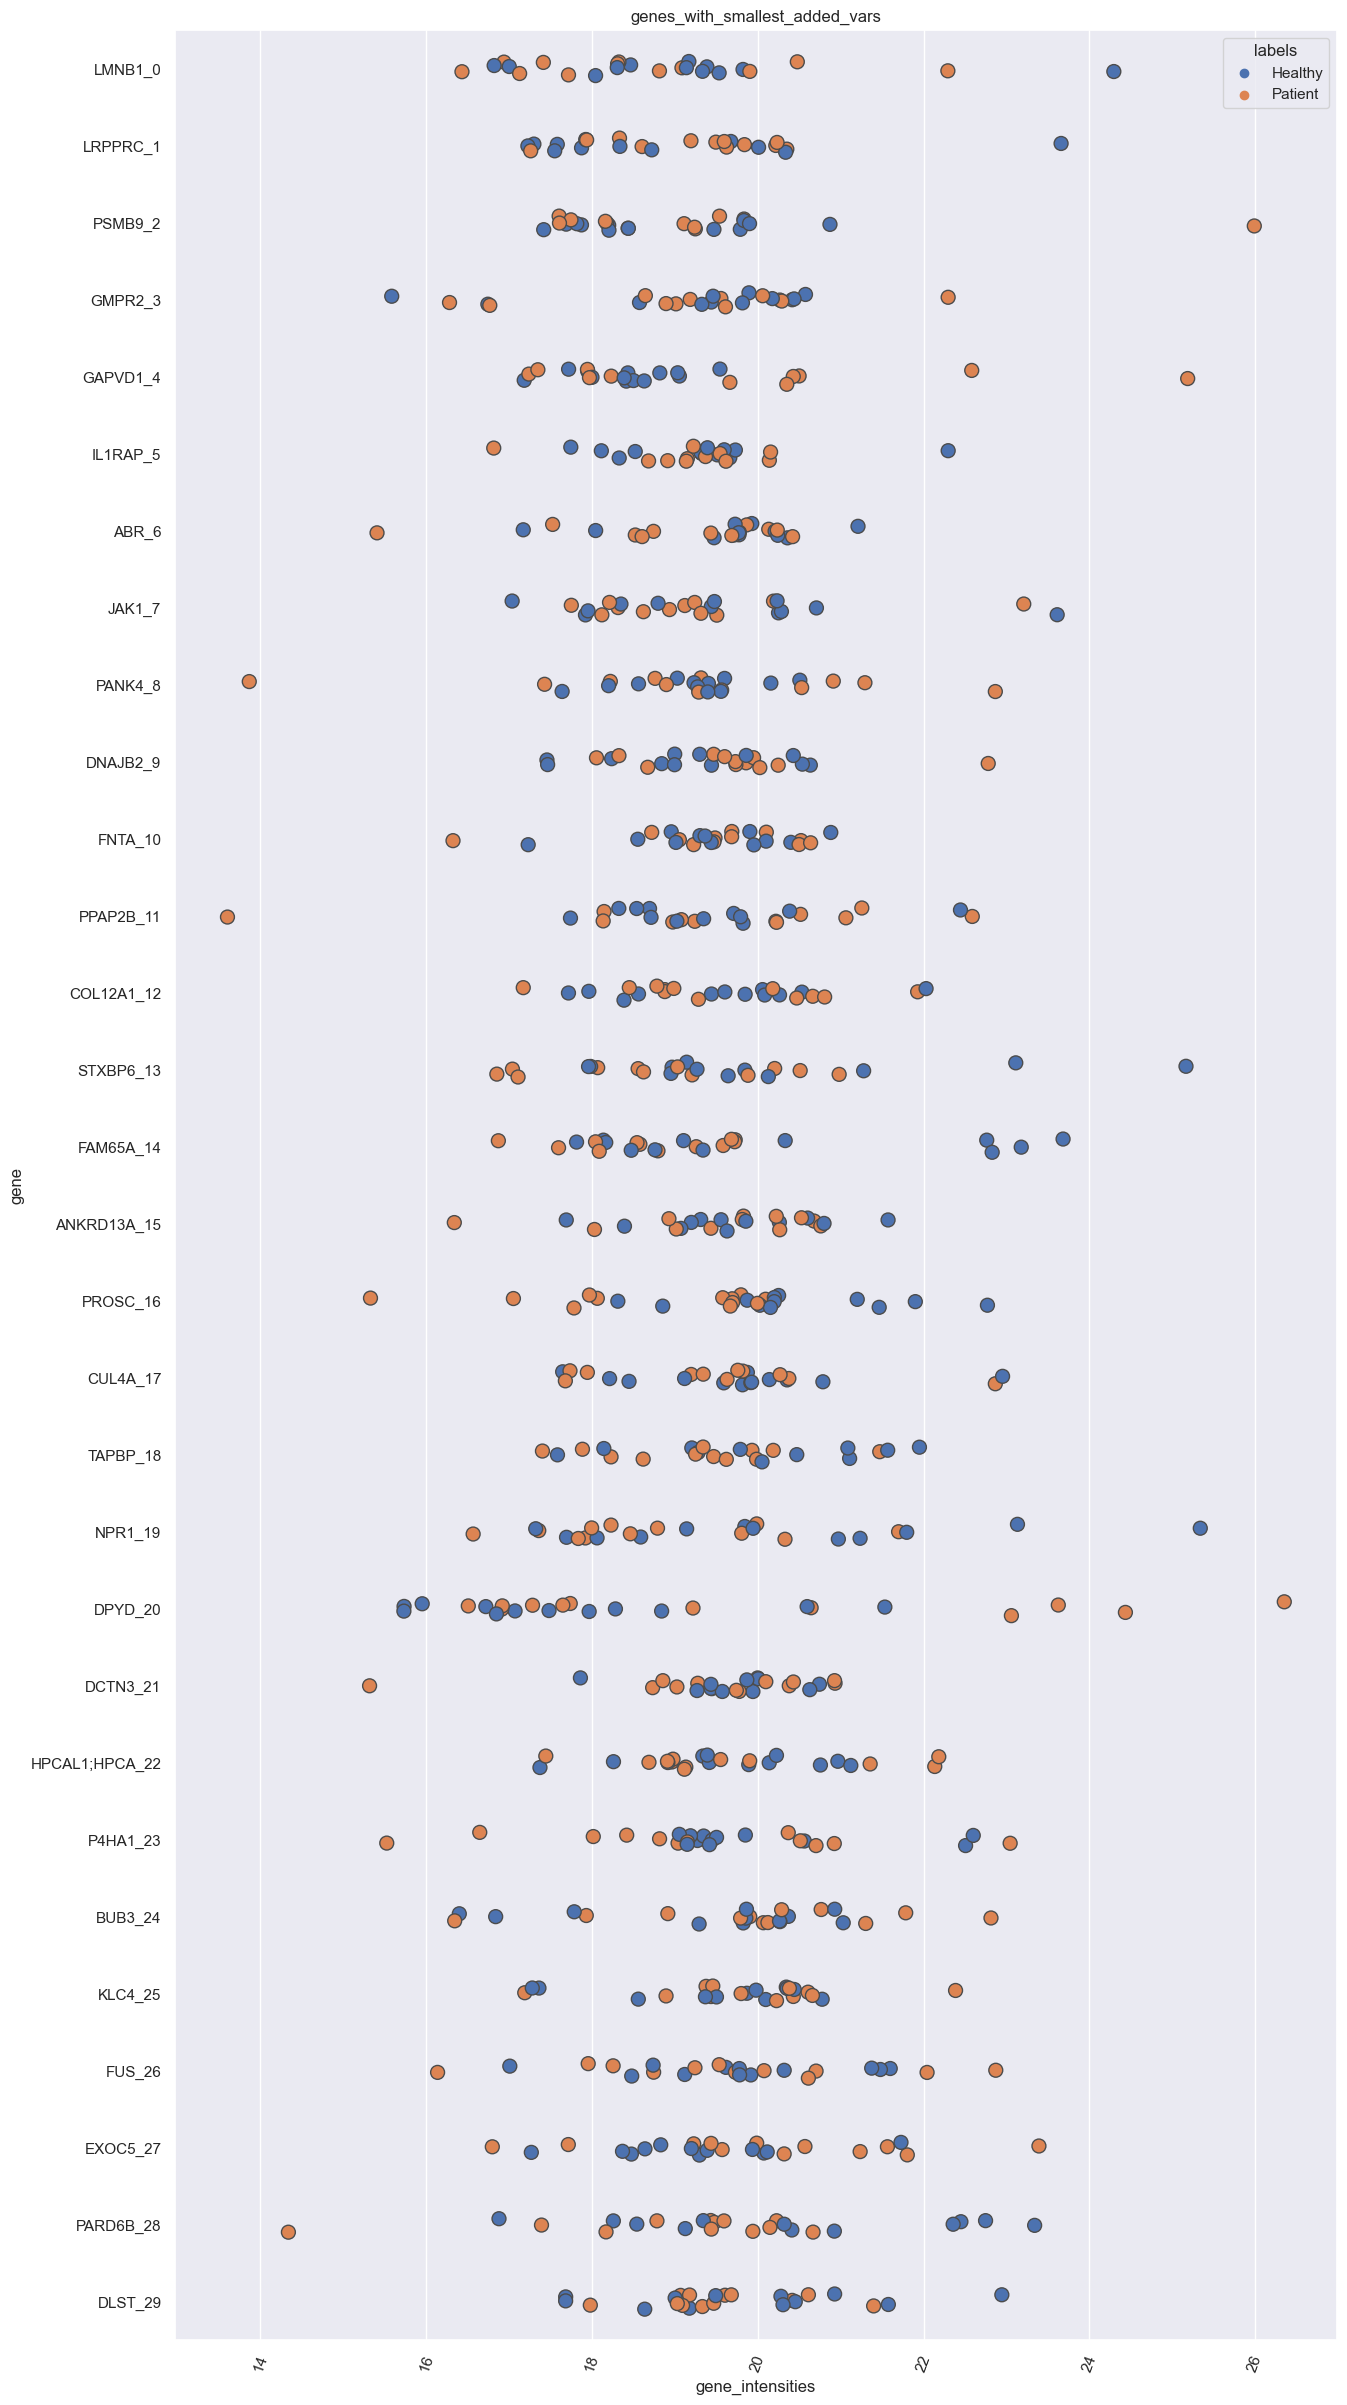

In [23]:
generate_scatter_plot_for_list(genes_with_smallest_added_vars, "genes_with_smallest_added_vars")

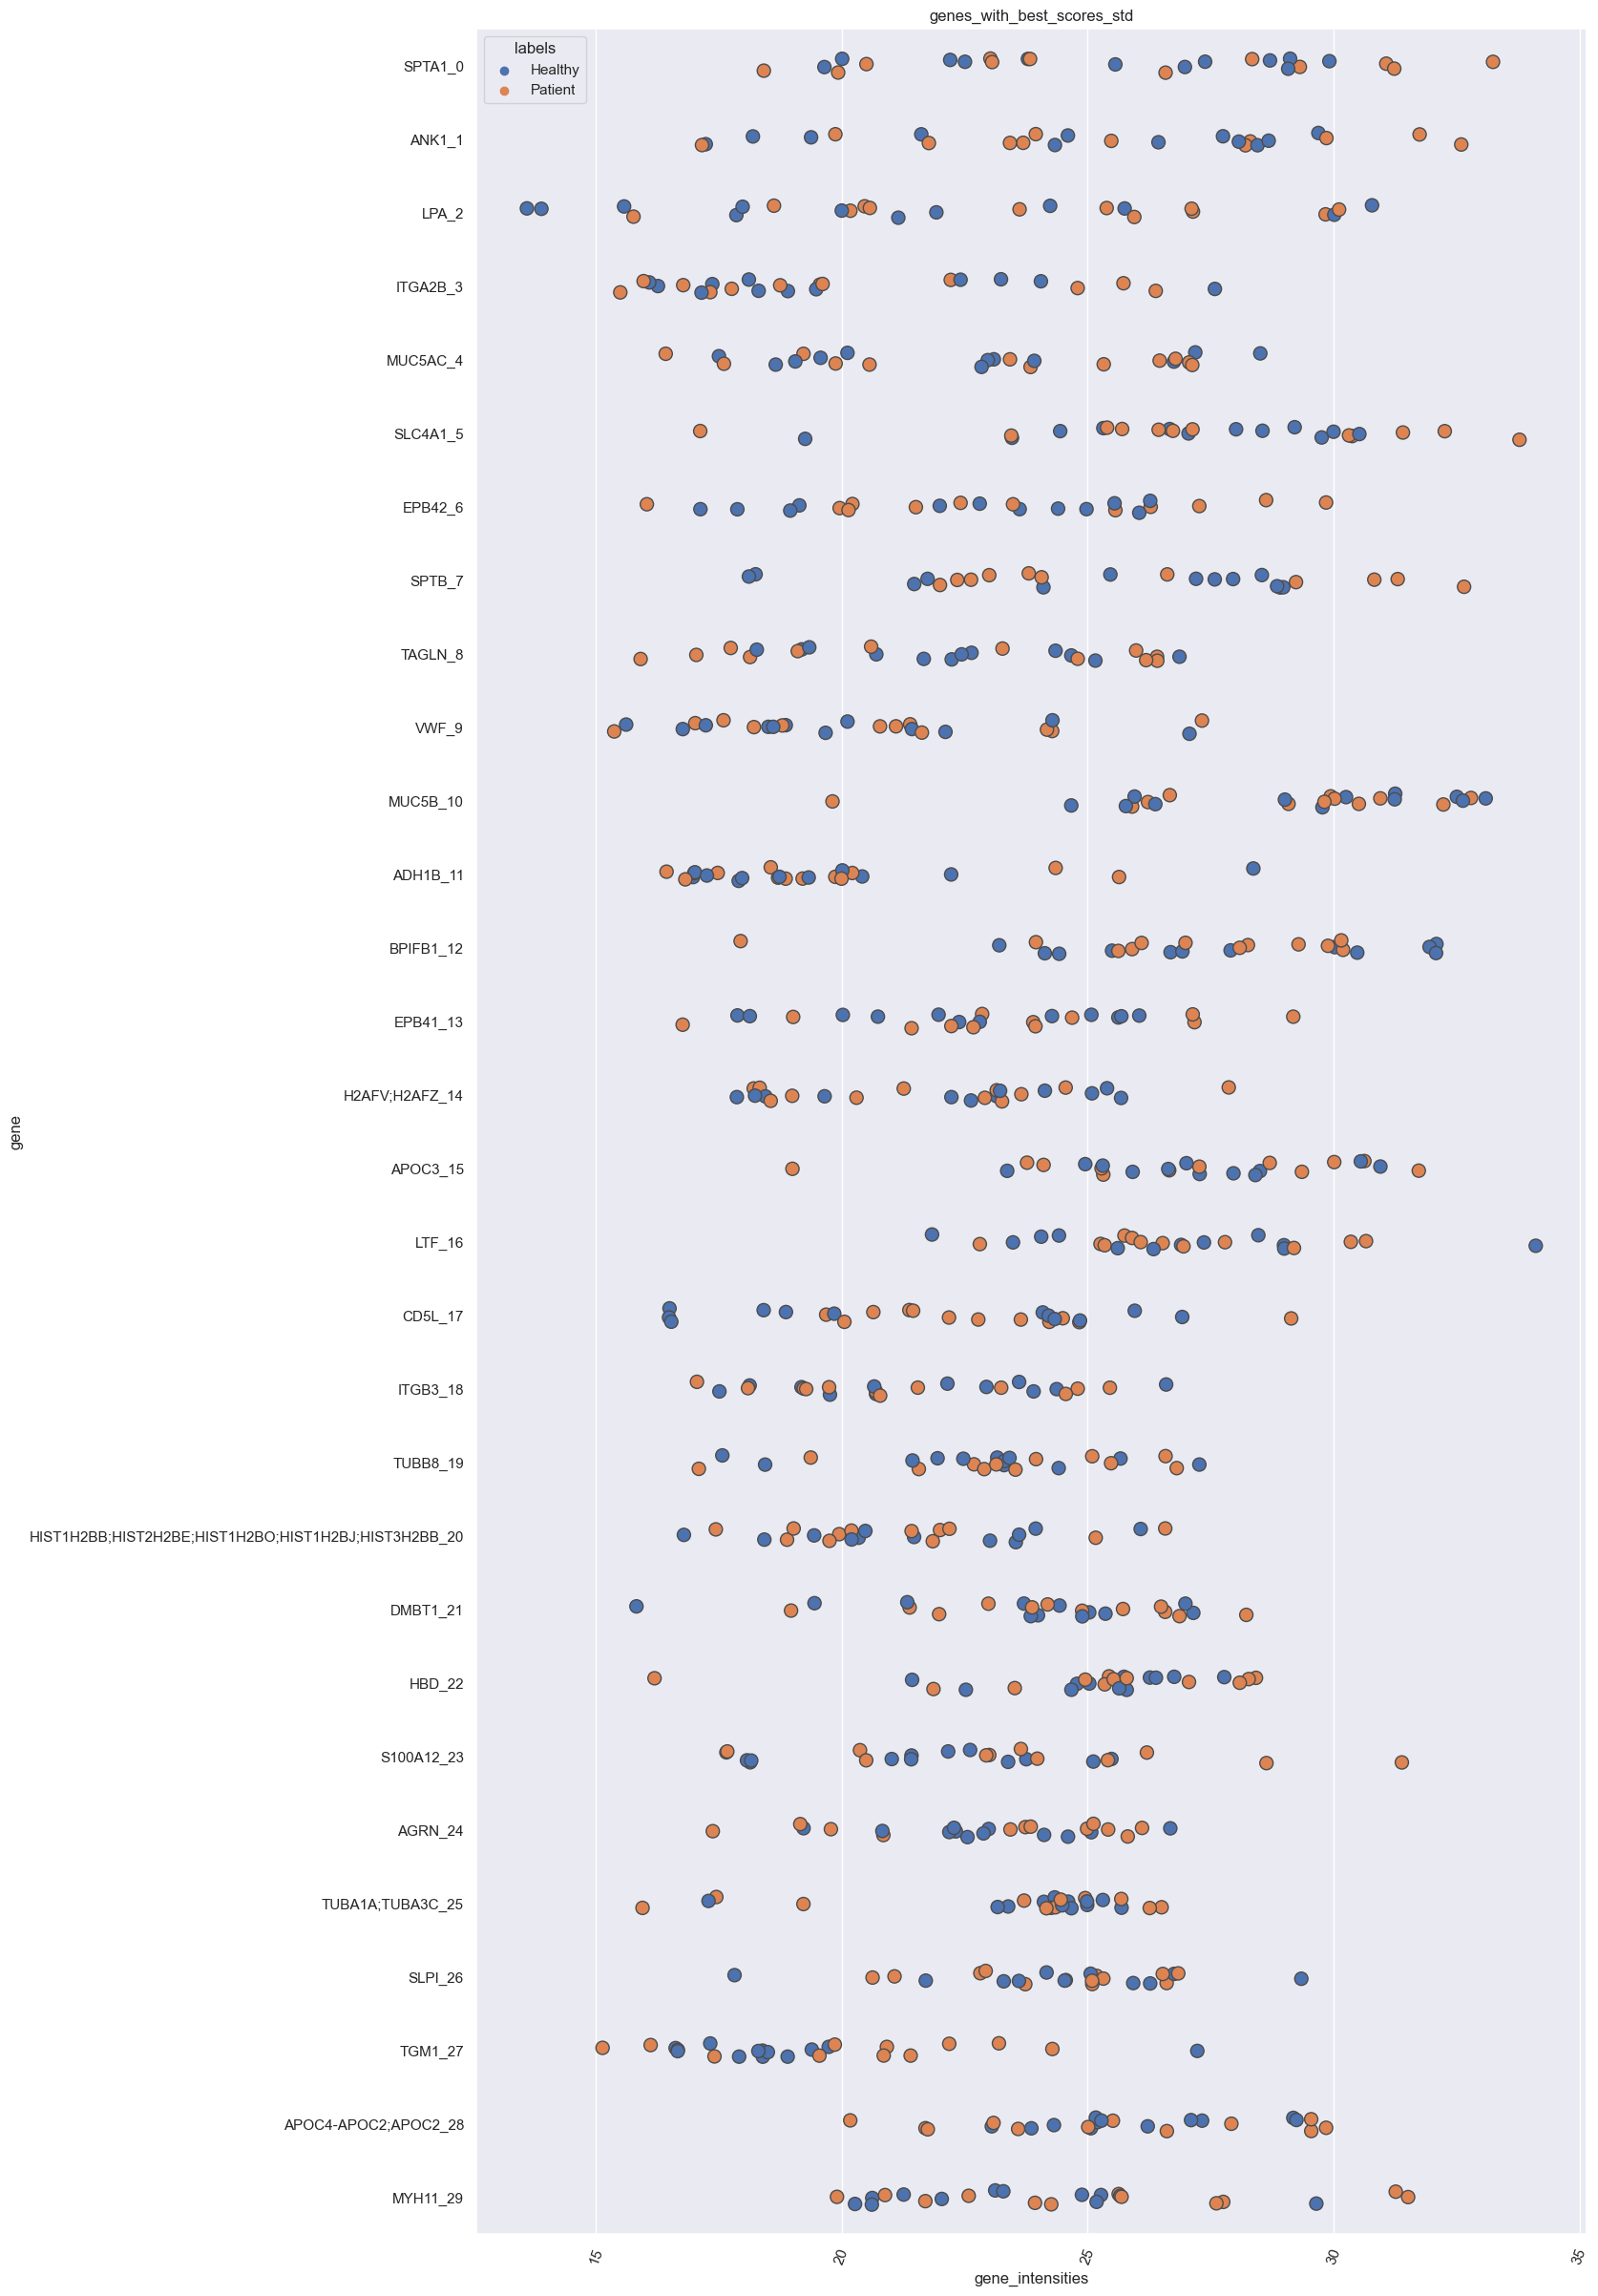

In [24]:
generate_scatter_plot_for_list(genes_with_best_scores_std, "genes_with_best_scores_std")

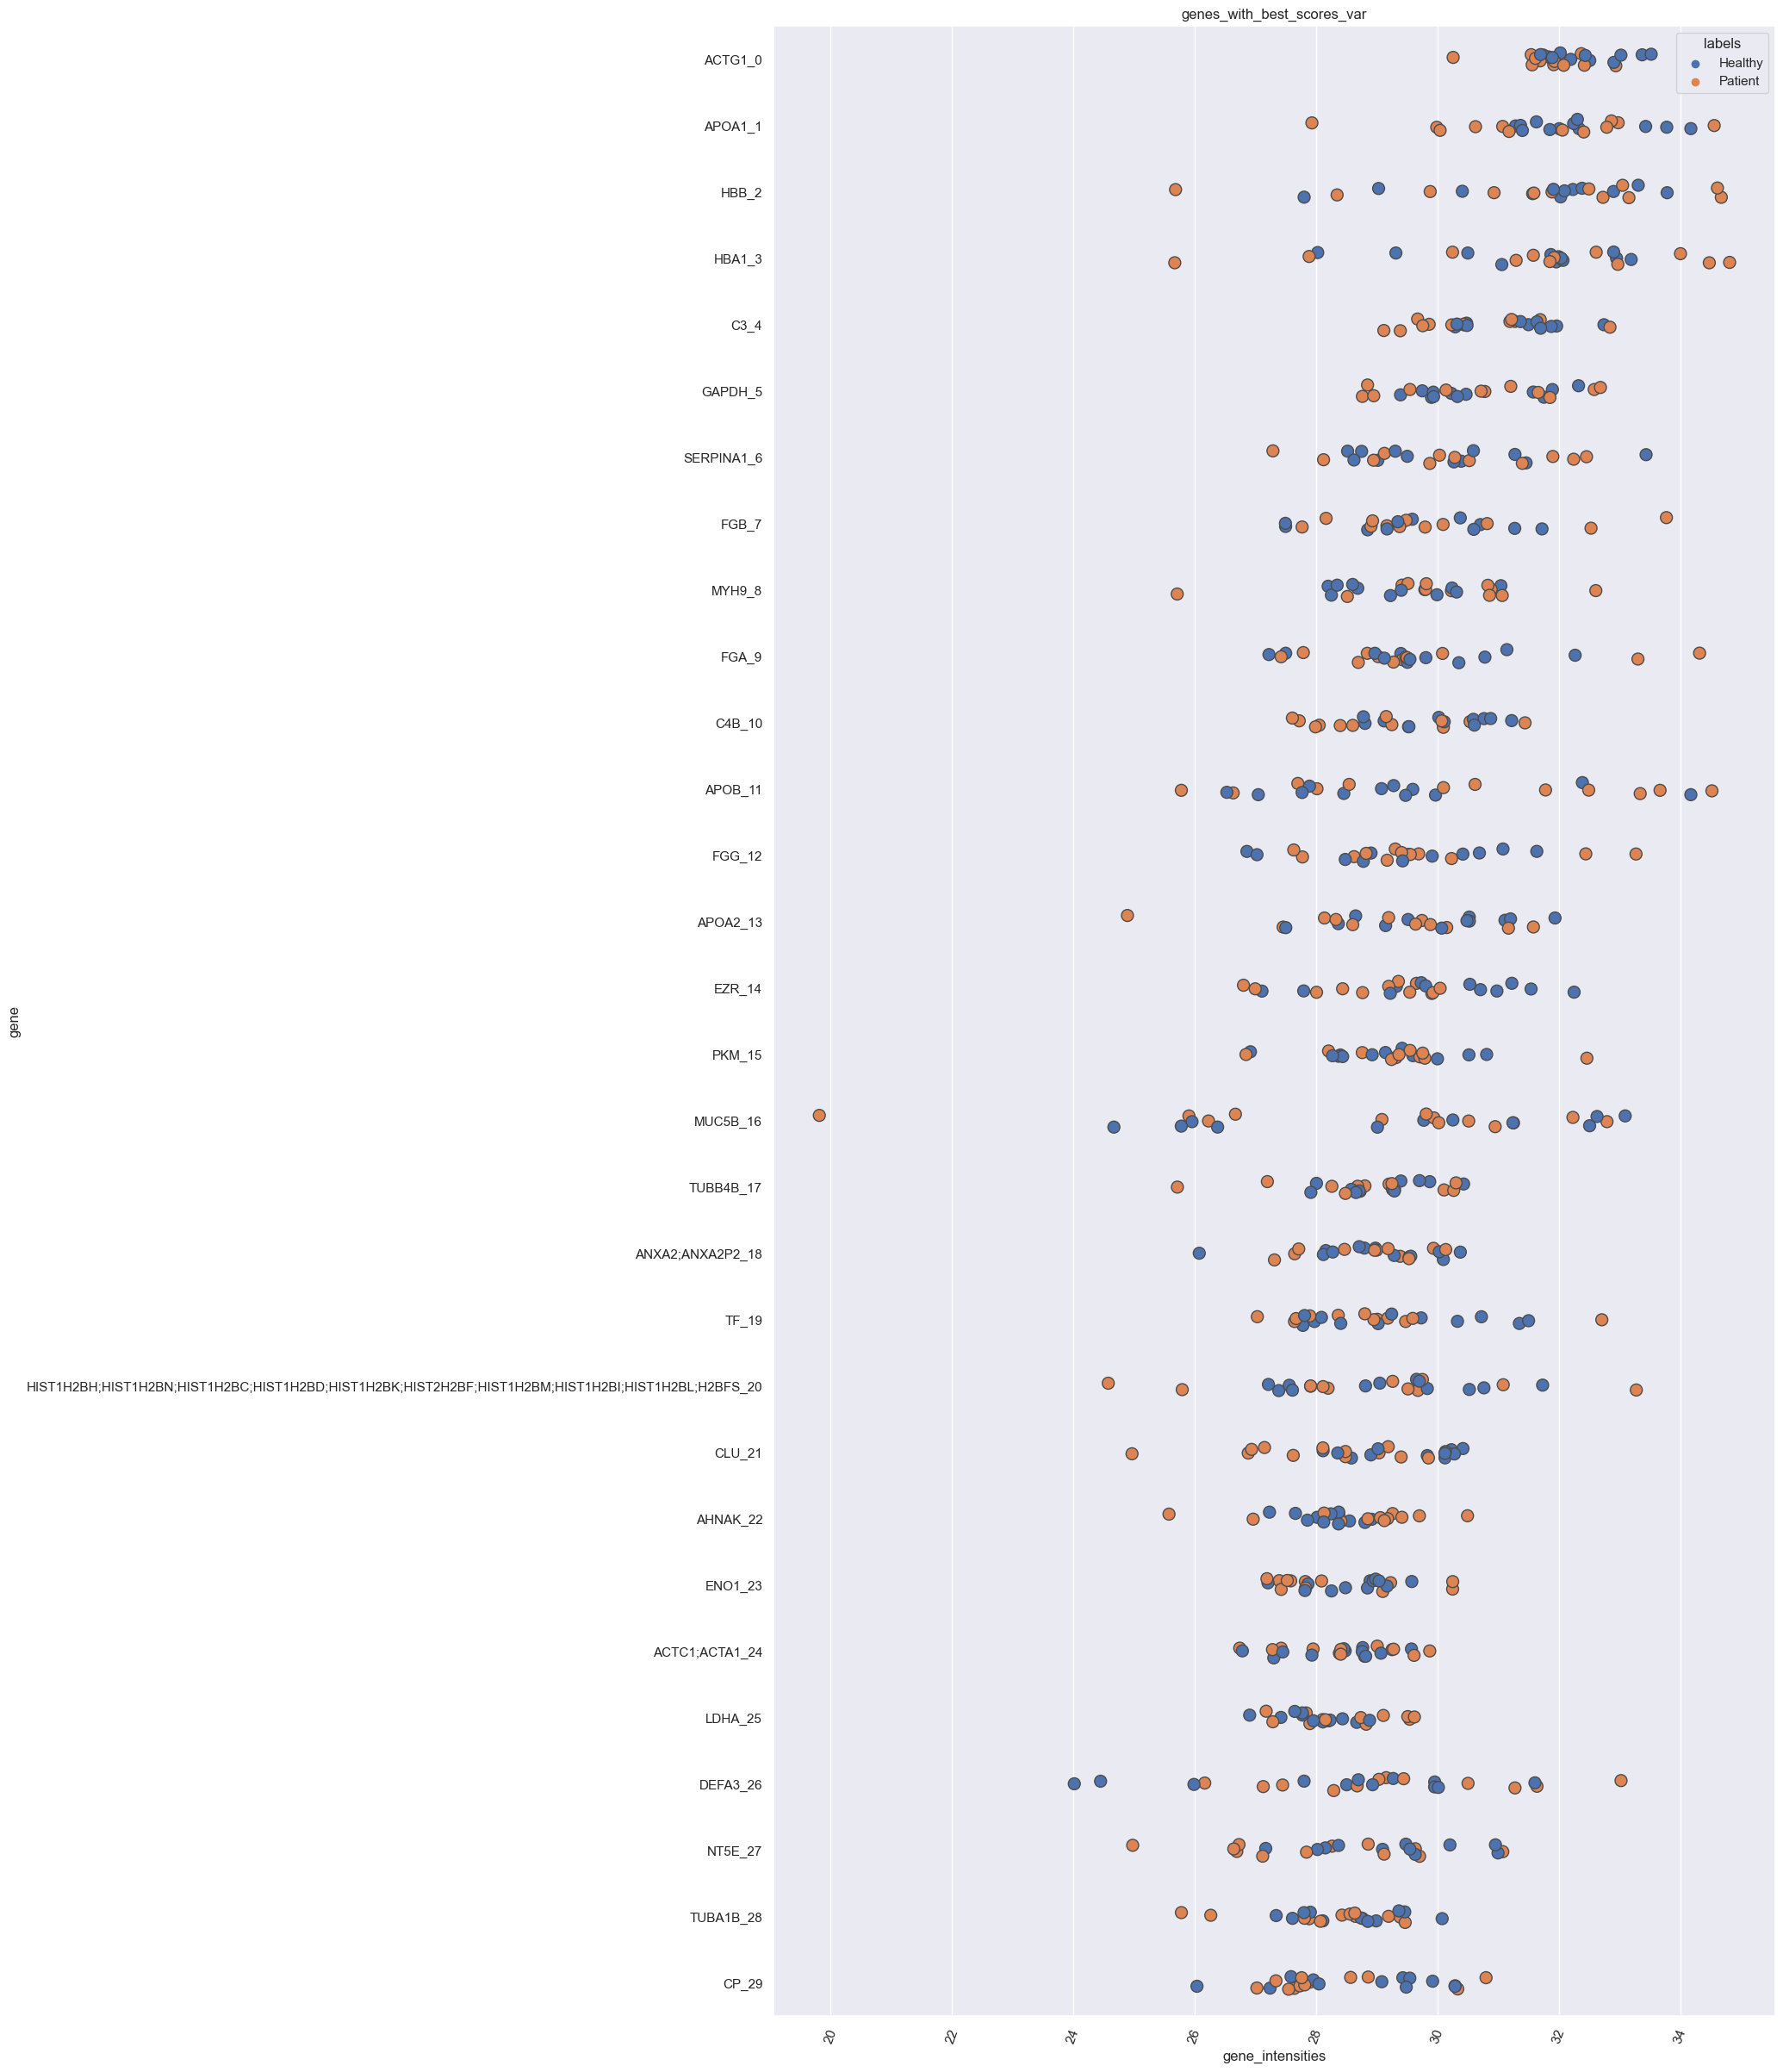

In [25]:
generate_scatter_plot_for_list(genes_with_best_scores_vars, "genes_with_best_scores_var")

,intensities,genes
0,"[26.70925, 29.1503, 25.94905, 23.44859, 26.855...",KNG1
1,"[22.96383, 26.0879, 23.48395, 17.75475, 23.983...",KNG1
2,"[21.76891, 21.84671, 25.124, 19.78559, 23.7152...",SDCBP
3,"[25.08351, 24.80287, 28.23977, 28.08279, 26.89...",SDCBP
4,"[16.17299, 19.74018, 16.94157, 24.47327, 15.77...",CLCA4
5,"[20.1201, 19.47134, 22.89421, 29.11456, 19.535...",SPRR3
6,"[15.20055, 16.86193, 18.42865, 27.20191, 17.00...",DSG3
7,"[17.88166, 20.46875, 20.07012, 24.55982, 20.55...",SERPINB5
8,"[15.70315, 18.68116, 16.21809, 23.81577, 20.53...",IVL
9,"[20.02283, 17.55914, 20.60123, 23.59616, 17.03...",GLUL


TypeError: unhashable type: 'list'

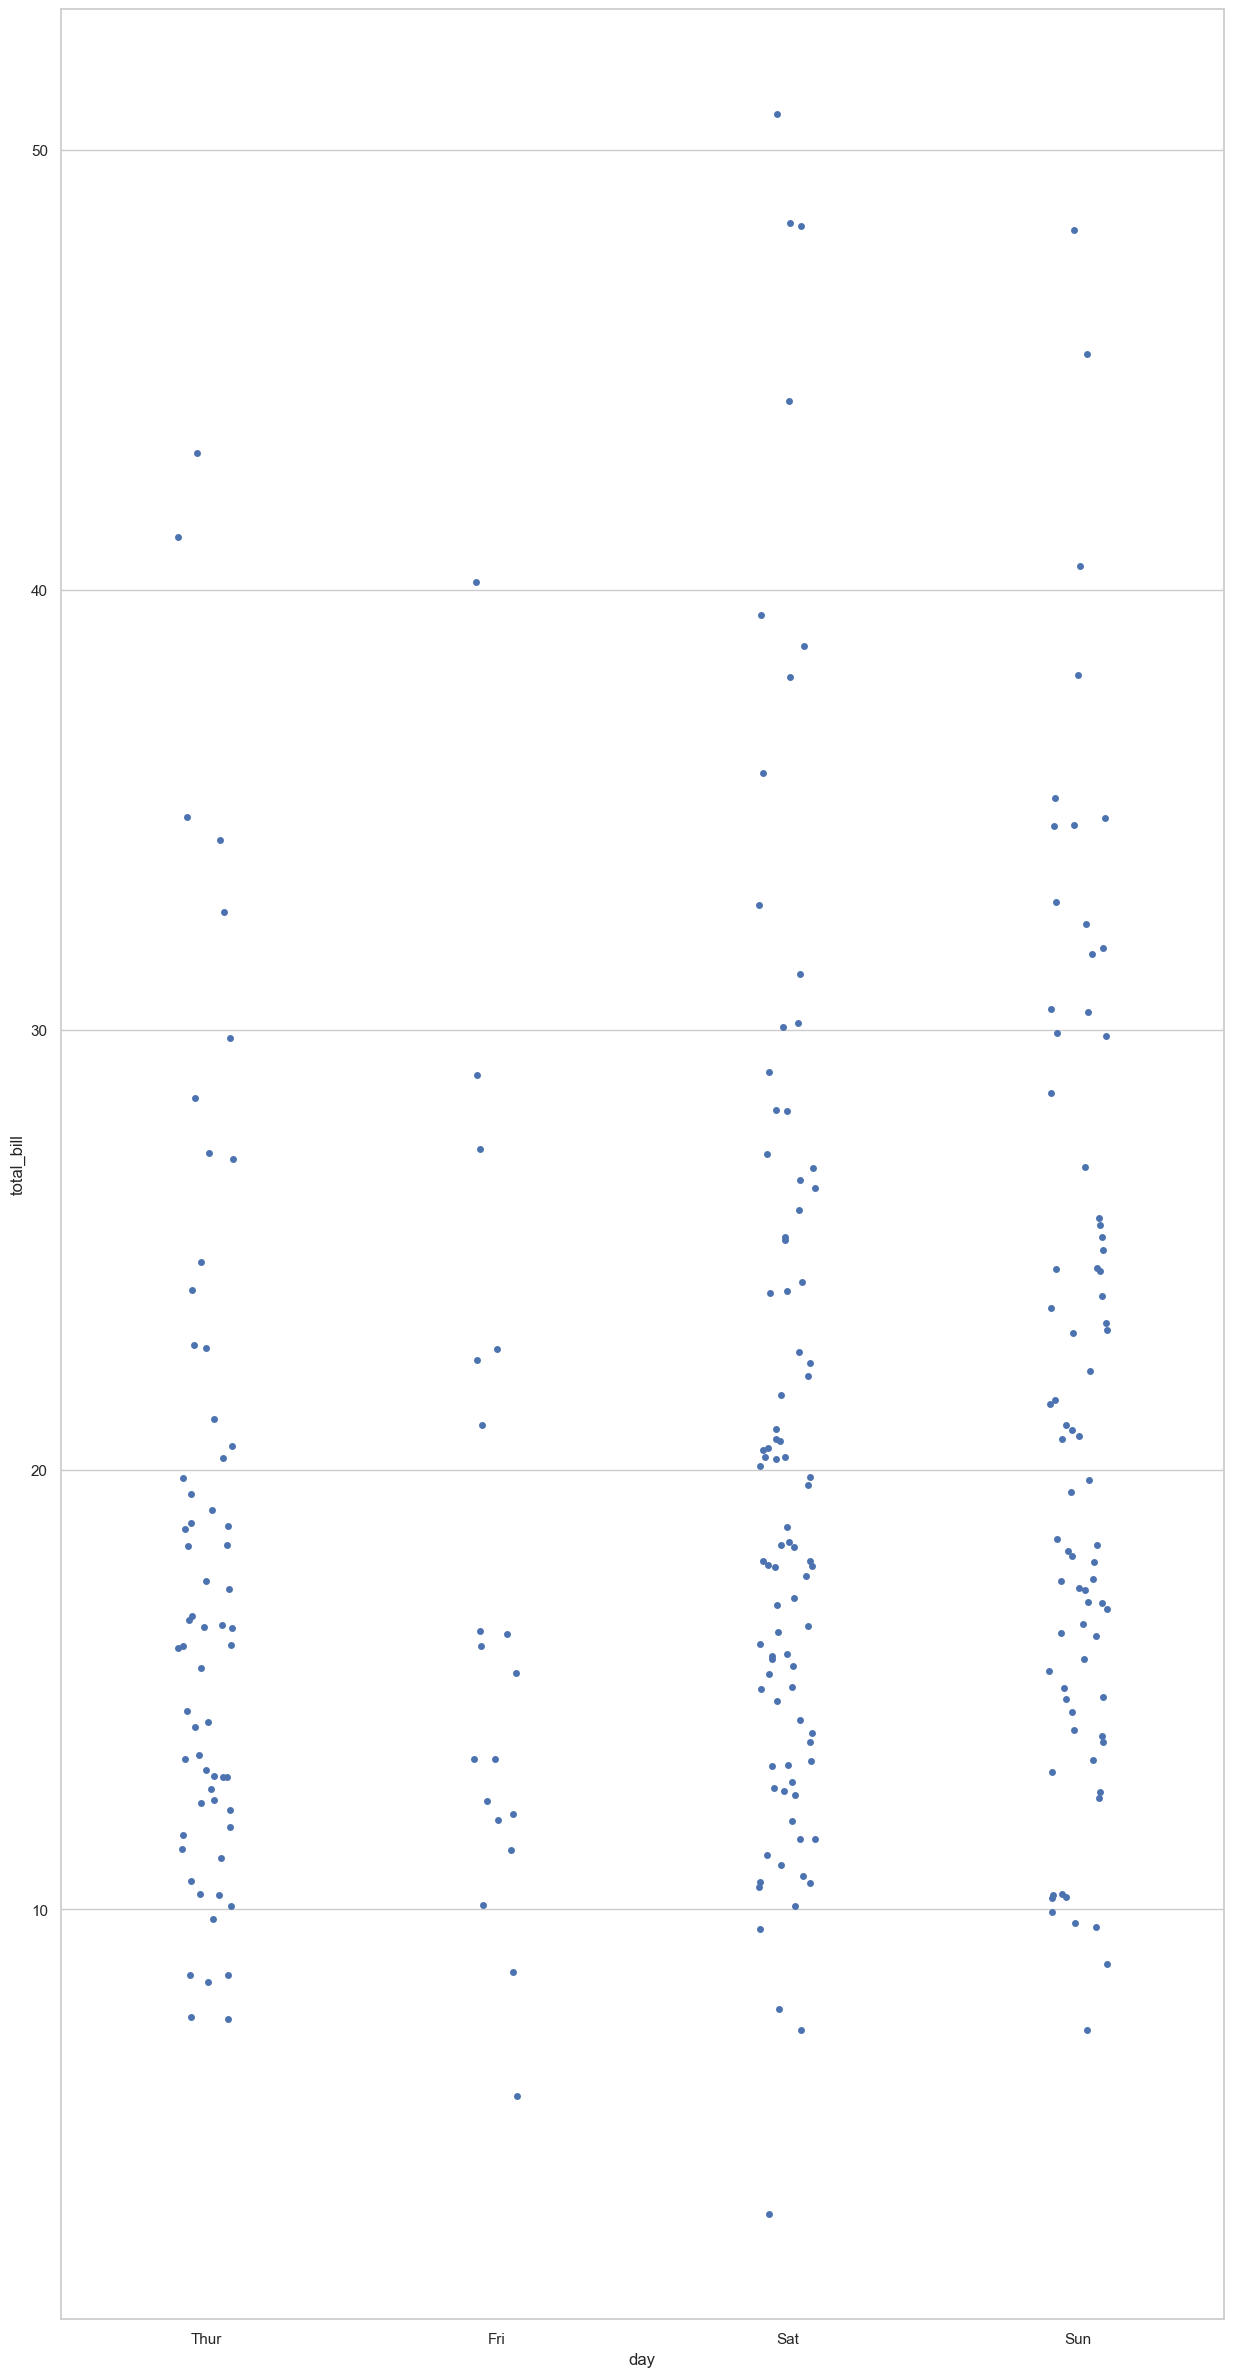

In [26]:
import seaborn as sns
sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.stripplot(x="day", y="total_bill", data=tips)

df_selected = df_transposed[genes_with_highest_delta_means]
gene_names = df_selected.columns
df_selected = df_selected.transpose()
intensities = pd.DataFrame(df_selected).to_numpy()
intensitiy_lists=pd.DataFrame()
intensitiy_lists['intensities'] = intensities.tolist()
intensitiy_lists["genes"] = gene_names
display(intensitiy_lists)

ax = sns.stripplot(x="genes", y="intensities", data=intensitiy_lists)
